## 1. Introduction


In the frame of my PhD project, a large data set of several sedimentological-, geophysical-, and chemical logs were collected from a 252-meter-long drill core. 
The goal is to analyze the data and: 
   - Comparing the visual-based classification of the sediments (classical geological way) with a data-based clustering of the logs. (possibly using a PCA)
   - Another goal would be to develop a log-based way to classify unconsolidated quaternary sediments. This would have several advances:
       - Core drilling is expensive ~1000 sFr/m
       - Takes a lot of time to analyze and describe -> 1-2 years from drilling to a proper profile
       - A combination of much cheaper destructive drilling with wireline logging could be an interesting alternative 
       
**Situation:**
In a first step, the three MSCL-Logs are compared since they represent the most complete data set and have a very close measurement spacing of 0.5 cm. Further, they are measured directly at the cores and, therefore, are directly comparable with the visual core description. Thus, the visual-based classification can be compared with the data-based clustering, and the impact of the different logs can be estimated. 

**Data Analysis**

- Data collection
    - MSCL-core-log data (collected during my PhD-studies)
- Description of the data (for each log individual)
    - Distribution of quality and lithology
    - Calculate means and std
    - Log data is normally distributed, -> no trend in/homogeneous data set (0-hypothesis-1)
        - Test normality of whole distribution (D`Agostino-Pearson-Test)
        - Test normality of individual sub-datasets (litho groups) (D`Agostino-Pearson-Test)
    - Distribution of the sub-datasets (based on visible core descriptions) is randomly distributed (0-hypothesis-2)
        - Test similarities of litho groups of each log (Kruskal-Wallis test) 
        - pair-wise comparison of each possible combination of the litho groups (Mannä-Whitney-U test)
    - Choose good plots
    
**Conclusions** 
- Distribution of log data:
    - Log data is not normally distributed -> q-q pots and D`Agostino-Pearson-Test
    - Sub-data sets are also not normally distributed -> q-q pots and D`Agostino-Pearson-Test
- Distribution of litho groups inside the whole log data:
    - Is not normally distributed, makes geological sense, shows no overlap -> Kruskal-Wallis test and Mann-Whitney-U test
- Judging similarities between the visual core description-based lithological classification and the scatter plots.
    - clustering is visible, backed by geological knowledge
- Qualitatively judging the value/impact of the analyzed logs on the data clustering -> input for the main project: developing a (geo)physical and chemical borehole/drillcore log-based classification system for unconsolidated quaternary sediments.
    - Qualitatively: Density and Natural gamma log  clearly influence the clustering, whereas magnetic susceptibility does not have much impact on clustering by this type of sediments (heterogeneous, reworked, ...)
    - Possible options for other logs for combination: 
        - Resistivity
        - Porosity


**Definition of significant**

P-values below 0.001 ar considered as  unlikely enough to reject the 0-hypothesis. 


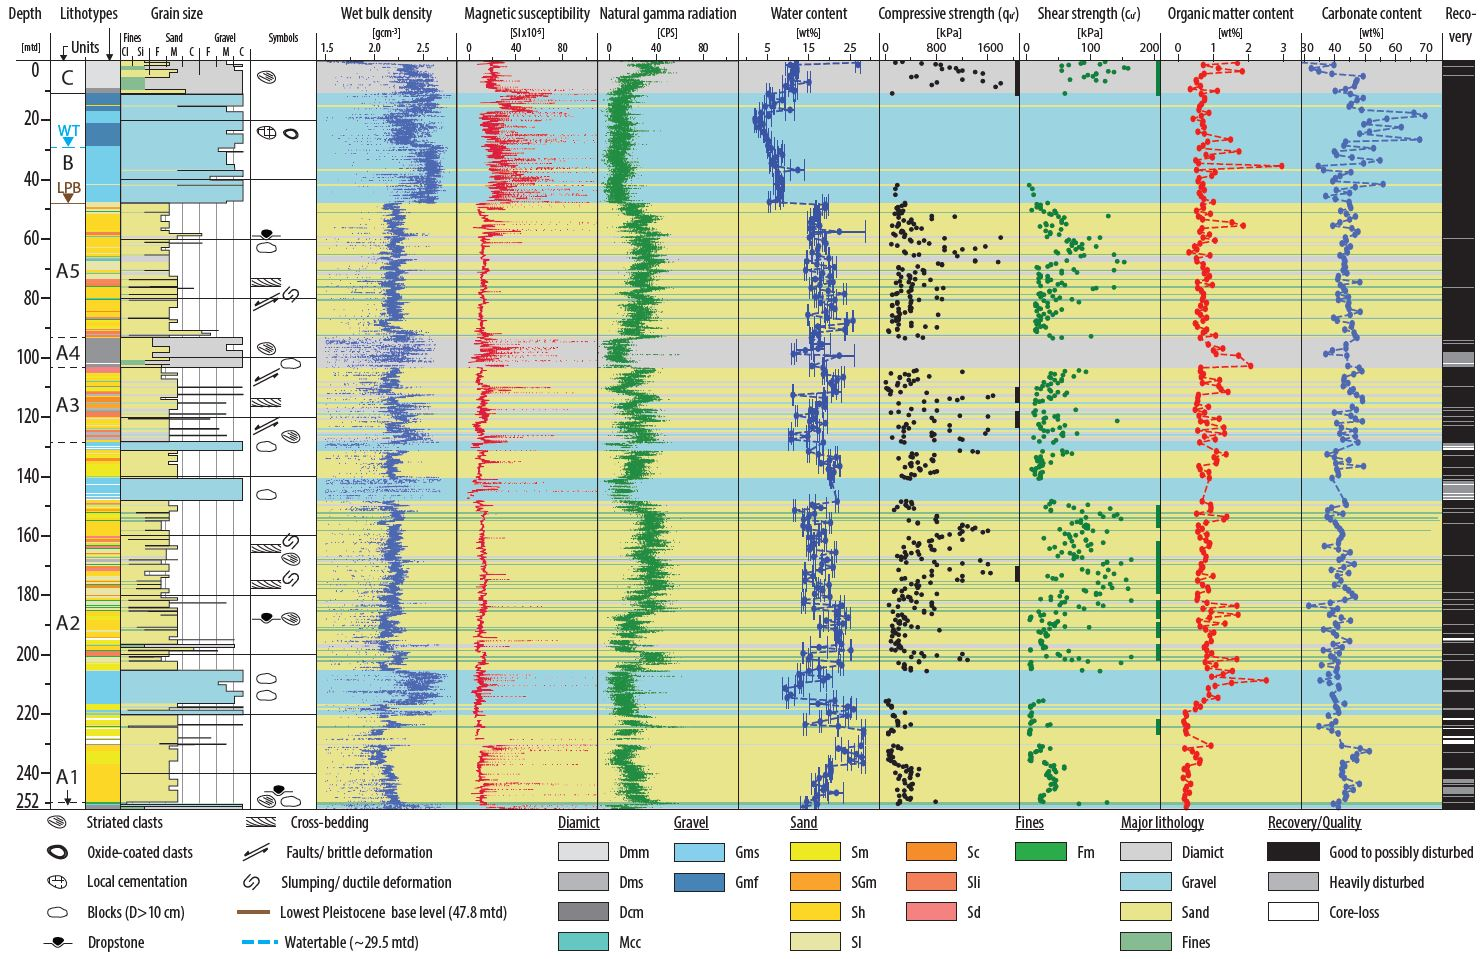

Lithological and petrophysical data versus depth. Columns from left to right: depth-scale [mtd], stratigraphic units (labeled with
A1–A5, B, and C; WTDwater table; LPBDlowest Pleistocene base level), lithotypes, dominant grain size with indicated main lithotypes,
symbols of prominent observations, wet bulk density (gcm^-3), magnetic susceptibility (SI10^-5), natural gamma radiation (CPS,
counts per second), water content with indicated standard deviation (wt %), undrained uniaxial compressive strength (q0u
) (kPa), undrained
shear strength (c0u
) (kPa), organic matter content (wt %), carbonate content (wt %), and the recovery. Main lithotypes are indicated as semitransparent
color codes over the plot’s entire width.

Source: Schaller et al., 2023 (submitted)

# 2. Description of the datasets

## 2.1 seting up the needed data for using

### 2.1.1 loading needed libraries

In [1]:
#importing the needed libraries
import os #importing OperationSystem modul
import pandas as pd #pandas
import numpy as np #numpy
import scipy #statistic module
from scipy import stats#statistics
import matplotlib.pyplot as plt#matplotlib
import statsmodels.api as sm#statistics
import mpltern# used for ternary plots, no standard python library (see: https://mpltern.readthedocs.io/en/latest/ )

### 2.1.2 Input/options for loading data

In [2]:
#options
control = True#if set to True, control values from the data processing will be printed

#seting up the working directory to the choosen director (raw string input), wher the data set is located
abs_path_log=r'C:\Users\Sebastian Schaller\workspace\CAS_ADS\02_module_2\presentation\Data'

os.chdir(abs_path_log)#seting working directory to the location of the mscl-log
os.getcwd()#geting the curent working directory, to check if working in the right directory

'C:\\Users\\Sebastian Schaller\\workspace\\CAS_ADS\\02_module_2\\presentation\\Data'

### 2.1.3 loading and seting up the needed data

In [3]:
#loading and seting up the needed data set.
file_name1 = '5068_2_A_Combined_MSCL_data_filtred_rescaled_20230601_ss.csv'#file name of mscl_data
#loading compleed data set
df_mscl = pd.read_csv(file_name1,header=0)#loading the data as a pandas data frame, with the original headers
#summary of the loaded data set

#reducing the dataframe to the needed colums, iltred and unfiltred densety, magnetic logs,
#natural gamma log, data quality clasification, and lithoclas clasification
header_data = pd.Series(df_mscl.columns)#converting the extracted column eheaders into a panda series
used_colums_indexs = [10,13,16,20,21]#columne index of selected data 
heade_list_df_reduced = list(header_data[used_colums_indexs])#lis of headers of the needed data columnes
df_reduced = df_mscl[heade_list_df_reduced]#creating a new data frame with the needed data columnes

#rounding the data to reasonabel precision: densety -> 3 after digits, manetic and gamma to 1 after digit
df_reduced = df_reduced.copy()#coping the data frame to be able to overwrite the old columnes with the late rounded values
df_reduced.iloc[:,0] = df_reduced[heade_list_df_reduced[0]].round(decimals = 3).copy() #densety data
df_reduced.iloc[:,1:] = df_reduced[heade_list_df_reduced[1:]].round(decimals = 1).copy()  #magsus and gamma data

#updating the litho clas to the four man types: D = diamicts (1), G = Gravel (7), S = Sand (11), F = fines (clay +silt, 19)
df_reduced[heade_list_df_reduced[-1]] = np.where(df_reduced[heade_list_df_reduced[-1]]>= 19,
                                                 19,df_reduced[heade_list_df_reduced[-1]])

df_reduced[heade_list_df_reduced[-1]] = np.where((df_reduced[heade_list_df_reduced[-1]]<19)&
                                                 (df_reduced[heade_list_df_reduced[-1]]>= 11),
                                                 11,df_reduced[heade_list_df_reduced[-1]])

df_reduced[heade_list_df_reduced[-1]] = np.where((df_reduced[heade_list_df_reduced[-1]]<11)&
                                                 (df_reduced[heade_list_df_reduced[-1]]>= 7),
                                                 7,df_reduced[heade_list_df_reduced[-1]])

df_reduced[heade_list_df_reduced[-1]] = np.where(df_reduced[heade_list_df_reduced[-1]]<7,
                                                 1,df_reduced[heade_list_df_reduced[-1]])

#exclding the heavyly disturbed data points -> core qulaity clas >2 and droping anny remaning nans (savfty)
df_reduced_clean = df_reduced[df_reduced[heade_list_df_reduced[-2]]<2].copy().dropna()

if control == True:
    print('info of compleet data set: ')
    print(df_mscl.info())#prints info of compleet data set
    print('info of reduced data set:')
    print(df_reduced.info())#info of reduced data frame
    print('First 5 rows of the reduced data set: ',df_reduced.head())
    print('info of reduced and cleaned data set: ')
    print(df_reduced_clean.info())   
    print('First 5 rows of the reduced and cleaned data set: ',df_reduced_clean.head())

info of compleet data set: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47591 entries, 0 to 47590
Data columns (total 24 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Composite_depth [cm]               47591 non-null  float64
 1   Rescaled SECT_DEPTH [cm]           47591 non-null  float64
 2   SB_DEPTH [m]                       47591 non-null  float64
 3   SECT_NUM_MC                        47591 non-null  float64
 4   SECT_DEPTH [cm]                    47591 non-null  float64
 5   CT [cm]                            46350 non-null  float64
 6   PWAmp                              46350 non-null  float64
 7   PWAmp (pw and dens filtred)        3647 non-null   float64
 8   PWVel [m/s]                        46350 non-null  float64
 9   PWVel [m/s] (pw and dens filtred)  3647 non-null   float64
 10  Dens [g/cc]                        46350 non-null  float64
 11  Dens [g/cc] (pw and dens f

## 2.2 Overview distribution pie plots
### 2.2.1 setting up the needed data

In [4]:
#seting up and extracting the needed data for the filter impact plot on lithology and corequality distribution
#unfiltred
total_nr_dp_uf = len(df_reduced[heade_list_df_reduced[-2]])#total number of data point
#counts of unique values in quality (classes) and lithologies (,ain litho groups)
values_cq_uf, counts_cq_uf = np.unique(df_reduced[heade_list_df_reduced[-2]], return_counts= True)#quality
values_lith_uf, counts_lith_uf = np.unique(df_reduced[heade_list_df_reduced[-1]], return_counts= True)#lithology
#filtred
#total number of data point
total_nr_dp_c = len(df_reduced_clean[heade_list_df_reduced[-2]])#total number of data point
#counts of unique values in quality (classes) and lithologies (,ain litho groups)
values_cq_c, counts_cq_c = np.unique(df_reduced_clean[heade_list_df_reduced[-2]], return_counts= True)#quality
values_lith_c, counts_lith_c = np.unique(df_reduced_clean[heade_list_df_reduced[-1]], return_counts= True)#lithology

if control == True:
    print(f'numbers of nans in unfiltred data is: {df_reduced[heade_list_df_reduced[0]].isna().sum()}, shoud be equal to Quality type 4')
    print(f'numbers of nans in filtred data is: {df_reduced_clean[heade_list_df_reduced[0]].isna().sum()}, should be 0')
    print('Lithoclasses:Diamict (1), Gravel (7), Sand (11), and Fines (19)')
    print(f'unfiltred quality clases:{values_cq_uf}, coresponding frequency: {counts_cq_uf}')
    print(f'unfiltred litho classes {values_lith_uf},coresponding frequency: {counts_lith_uf}')        
    print(f'filtred quality clases:{values_cq_c}, coresponding frequency: {counts_cq_c}')
    print(f'filtred litho classes {values_lith_c}, coresponding frequency: {counts_lith_c}')

numbers of nans in unfiltred data is: 1241, shoud be equal to Quality type 4
numbers of nans in filtred data is: 0, should be 0
Lithoclasses:Diamict (1), Gravel (7), Sand (11), and Fines (19)
unfiltred quality clases:[0 1 2 4], coresponding frequency: [34047  7584  4719  1241]
unfiltred litho classes [ 1  7 11 19],coresponding frequency: [ 6248 11094 29297   952]
filtred quality clases:[0 1], coresponding frequency: [34047  7584]
filtred litho classes [ 1  7 11 19], coresponding frequency: [ 4845  9657 26210   919]


### 2.2.2 Overview of quality and litho distribution pie plots with filter impact

Text(0.5, 1.0, 'Cleaned distribution of main lithologies(n total = 41631)')

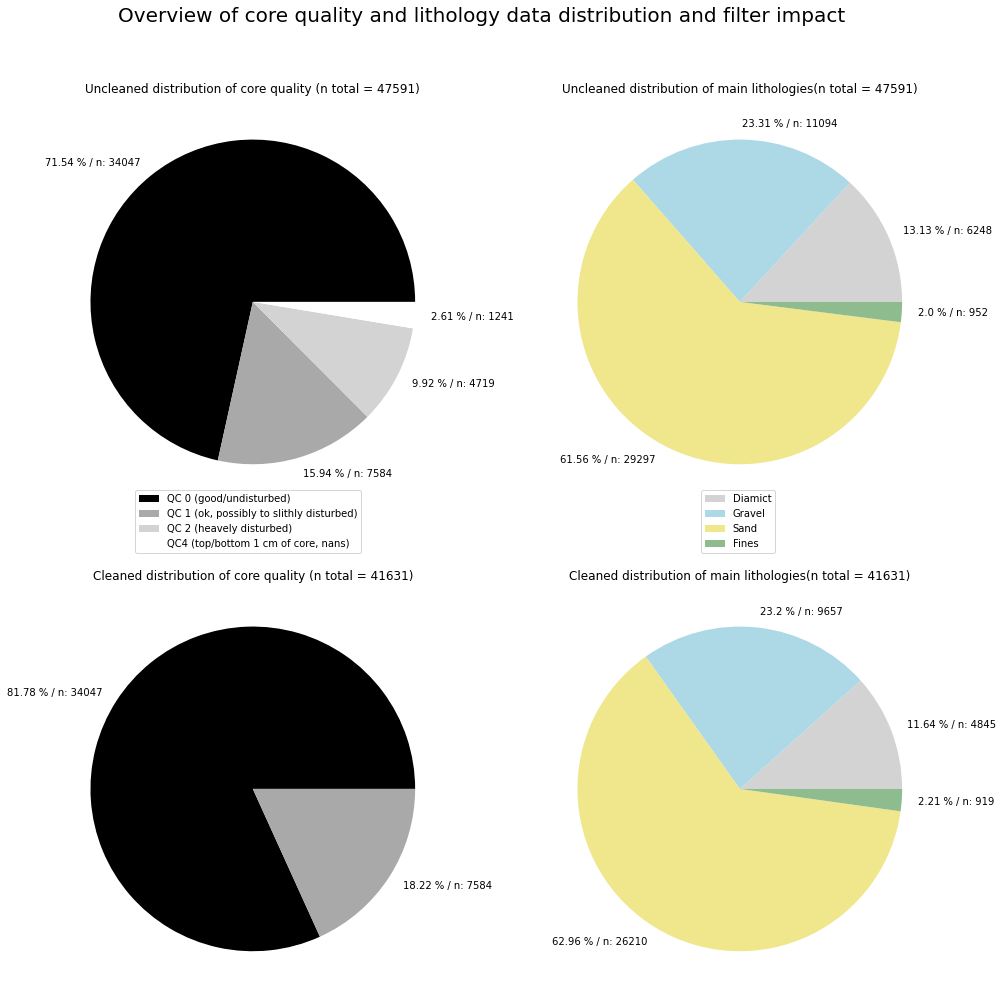

In [5]:
#creating 4 pie-plots showing the disrtibution of the quality classes and the four main litho types
#befor and after applaying the quality filter

#list of legends labels for plot
labels_cq = ['QC 0 (good/undisturbed)','QC 1 (ok, possibly to slithly disturbed)',
          'QC 2 (heavely disturbed)', 'QC4 (top/bottom 1 cm of core, nans)']
labels_lith = ['Diamict','Gravel','Sand','Fines']

#colors for plots
colors_cq = ['k','darkgrey','lightgrey','w']#quality
colors_lith = ['lightgray','lightblue','khaki','darkseagreen']#lithology

#converting the counts into %
#unfiltred
sizes_cq_uf = np.multiply(np.divide(counts_cq_uf,len(df_reduced[heade_list_df_reduced[-1]])),100)#quality
sizzes_lith_uf = np.multiply(np.divide(counts_lith_uf,len(df_reduced[heade_list_df_reduced[-1]])),100)#lithology
#filtred
sizes_cq_c = np.multiply(np.divide(counts_cq_c,len(df_reduced_clean[heade_list_df_reduced[-1]])),100)#quality
sizzes_lith_c = np.multiply(np.divide(counts_lith_c,len(df_reduced_clean[heade_list_df_reduced[-1]])),100)#lithology

#producing the numerical labes (% and total numer of datapoint of each pie pice)
#unfiltred
labels_cq_nr_uf = [f'{sizes_cq_uf[i].round(2)} % / n: {counts_cq_uf[i]}' for i in range(len(sizes_cq_uf))]#quality
#lithology
labels_lith_nr_uf = [f'{sizzes_lith_uf[i].round(2)} % / n: {counts_lith_uf[i]}' for i in range(len(sizzes_lith_uf))]
#filtred
labels_cq_nr_c = [f'{sizes_cq_c[i].round(2)} % / n: {counts_cq_c[i]}' for i in range(len(sizes_cq_c))]#quality
labels_lith_nr_c = [f'{sizzes_lith_c[i].round(2)} % / n: {counts_lith_c[i]}' for i in range(len(sizzes_lith_c))]#lithology

fig0, ax = plt.subplots(2,2, figsize=(16,16))#seting up the subplots setings
fig0.suptitle('Overview of core quality and lithology data distribution and filter impact',fontsize=20) 
#seting the position of the title
fig0.subplots_adjust(top=0.9)#addjusting titel

#ploting the pie plots
#unfiltred
ax[0][0].pie(sizes_cq_uf, colors = colors_cq,labels=labels_cq_nr_uf)#quality
ax[0][1].pie(sizzes_lith_uf, colors = colors_lith,labels=labels_lith_nr_uf)#lithology
#filtred
ax[1][0].pie(sizes_cq_c, colors = colors_cq,labels=labels_cq_nr_c)#quality
ax[1][1].pie(sizzes_lith_c, colors = colors_lith,labels=labels_lith_nr_c)#lithology

#legends (same for unfiltred/filtre)
ax[0][0].legend(bbox_to_anchor=(0.78, 0.05), labels = labels_cq )#quality
ax[0][1].legend(bbox_to_anchor=(0.6, 0.05),labels = labels_lith ,loc="best")#lithology

#unfiltred
ax[0][0].set_title(f'Uncleaned distribution of core quality (n total = {total_nr_dp_uf})')#quality
ax[0][1].set_title(f'Uncleaned distribution of main lithologies(n total = {total_nr_dp_uf})')#lithology
#filtred
ax[1][0].set_title(f'Cleaned distribution of core quality (n total = {total_nr_dp_c})')#quality
ax[1][1].set_title(f'Cleaned distribution of main lithologies(n total = {total_nr_dp_c})')#lithology


## 2.3 Histrogramms of the over all dirstributions of the logs
### 2.3.1 seting up the needed data

In [6]:
#separating the data in its induvidual logs (Densety, Magnetic susceptibilety, and natural gamma radiation)
#adding induvidual filter on each log, seperating the logs in ints sub-sets of the four main litho groups for
#induvidual plots

litho_list = [1,7,11,19]#list with numerical code of main litho types (1=diamict, 7=gravel, 11=sand, 19= fines)

#unfiltred all data
dens_uf = df_reduced[heade_list_df_reduced[0]].copy()#density
magsus_uf = df_reduced[heade_list_df_reduced[1]].copy()#Magsus
natgamma_uf = df_reduced[heade_list_df_reduced[2]].copy()#nat gamma

#all data filtred (type 3 removed)
dens_fc = df_reduced_clean[heade_list_df_reduced[0]].copy()#density
magsus_fc = df_reduced_clean[heade_list_df_reduced[1]].copy()#Magsus
natgamma_fc = df_reduced_clean[heade_list_df_reduced[2]].copy()#nat gamma

#induvidual filters
dens_fc = dens_fc[dens_fc>=1.5].dropna()#removing data <1.5 g/cm^3 and droping any remaining nans
magsus_fc = magsus_fc[magsus_fc<=100].dropna()#removing data <1.5 g/cm^3 and droping any remaining nans
natgamma_fc = natgamma_fc[natgamma_fc>=0].dropna()#removing data <1.5 g/cm^3 and droping any remaining nans

#prelocating the later produced sub data sets
#unfiltred
dens_values_stacked_hist_uf = [0]*len(litho_list)#density
magsus_values_stacked_hist_uf = [0]*len(litho_list)#Magsus
natgamma_values_stacked_hist_uf = [0]*len(litho_list)#nat gamma

#filtred 
dens_values_stacked_hist_fc = [0]*len(litho_list)#density
magsus_values_stacked_hist_fc = [0]*len(litho_list)#Magsus
natgamma_values_stacked_hist_fc = [0]*len(litho_list)#nat gamma

#statistical summary of  data
dens_sumary_list_fc = [0]*len(litho_list)#density
magsus_sumary_list_fc = [0]*len(litho_list)#Magsus
natgamma_sumary_list_fc = [0]*len(litho_list)#nat gamma

#for-loop to mask over the four main lithogroups and extract the subdata sets and the statistical summary for later use (pd.describe())
for i in range(len(litho_list)): 

    #masking over the four main litho types, 
    #density
    dens_data_uf = dens_uf[df_reduced[heade_list_df_reduced[-1]] == litho_list[i]]#unfiltred
    dens_data_fc = dens_fc[df_reduced_clean[heade_list_df_reduced[-1]] == litho_list[i]]#filtred 
    #Magsus
    magsus_data_uf = magsus_uf[df_reduced[heade_list_df_reduced[-1]] == litho_list[i]]#unfiltred
    magsus_data_fc = magsus_fc[df_reduced_clean[heade_list_df_reduced[-1]] == litho_list[i]]#filtred 
    #nat gamma
    natgamma_data_uf = natgamma_uf[df_reduced[heade_list_df_reduced[-1]] == litho_list[i]]#unfiltred
    natgamma_data_fc = natgamma_fc[df_reduced_clean[heade_list_df_reduced[-1]] == litho_list[i]] #filtred 
    

    #adding the data to the coresponding lsit
    #density
    dens_values_stacked_hist_uf[i]= dens_data_uf#unfiltred
    dens_values_stacked_hist_fc[i]= dens_data_fc#filtred
    #Magsus
    magsus_values_stacked_hist_uf[i]= magsus_data_uf#unfiltred
    magsus_values_stacked_hist_fc[i]= magsus_data_fc#filtred
    #nat gamma
    natgamma_values_stacked_hist_uf[i]= natgamma_data_uf#unfiltred
    natgamma_values_stacked_hist_fc[i]= natgamma_data_fc#filtred
        
    #adding the statisitc output summary of the #filtred subdata set
    dens_sumary_list_fc[i] = pd.DataFrame(dens_data_fc.describe()).round(2)##density
    magsus_sumary_list_fc[i] = pd.DataFrame(magsus_data_fc.describe()).round(2)##Magsus
    natgamma_sumary_list_fc[i] = pd.DataFrame(natgamma_data_fc.describe()).round(2)##nat gamma
    
if control == True:
    print('Summary of the unfiltred and uncleaned density data and its four subsets:')
    print(dens_uf.describe(),[dens_values_stacked_hist_uf[i].describe() for i in range(len(dens_values_stacked_hist_uf))])
    print('Summary of the filtred and cleaned density data and its four subsets:')
    print(dens_fc.describe(),[dens_values_stacked_hist_fc[i].describe() for i in range(len(dens_values_stacked_hist_fc))])
    print(f'numer of nans  in the cleand density data: {dens_fc.isna().sum()}') 
    print('Summary of the unfiltred and uncleaned magsus data and its four subsets:')
    print(magsus_uf.describe(),[magsus_values_stacked_hist_uf[i].describe() for i in range(len(magsus_values_stacked_hist_uf))])
    print('Summary of the filtred and cleaned magsus data and its four subsets:')
    print(magsus_fc.describe(),[magsus_values_stacked_hist_fc[i].describe() for i in range(len(magsus_values_stacked_hist_fc))])
    print(f'numer of nans  in the cleand magsus data: {magsus_fc.isna().sum()}')    
    print('Summary of the unfiltred and uncleaned natgamma data and its four subsets:')
    print(natgamma_uf.describe(),[natgamma_values_stacked_hist_uf[i].describe() for i in range(len(natgamma_values_stacked_hist_uf))])
    print('Summary of the filtred and cleaned natgamma data and its four subsets:')
    print(natgamma_fc.describe(),[natgamma_values_stacked_hist_fc[i].describe() for i in range(len(natgamma_values_stacked_hist_fc))])
    print(f'numer of nans  in the cleand natgamma data: {natgamma_fc.isna().sum()}')

Summary of the unfiltred and uncleaned density data and its four subsets:
count    46350.000000
mean         2.203907
std          0.250445
min         -0.006000
25%          2.129000
50%          2.208000
75%          2.310000
max          2.782000
Name: Dens [g/cc], dtype: float64 [count    6095.000000
mean        2.208390
std         0.310299
min         0.115000
25%         2.139000
50%         2.287000
75%         2.386000
max         2.712000
Name: Dens [g/cc], dtype: float64, count    10794.000000
mean         2.362448
std          0.311698
min         -0.006000
25%          2.288000
50%          2.430000
75%          2.558000
max          2.782000
Name: Dens [g/cc], dtype: float64, count    28522.000000
mean         2.143183
std          0.176457
min          0.010000
25%          2.107000
50%          2.177000
75%          2.227000
max          2.613000
Name: Dens [g/cc], dtype: float64, count    939.000000
mean       2.196821
std        0.086812
min        1.380000
25%       

### 2.3.2 Distribution histogramm of the over all density data

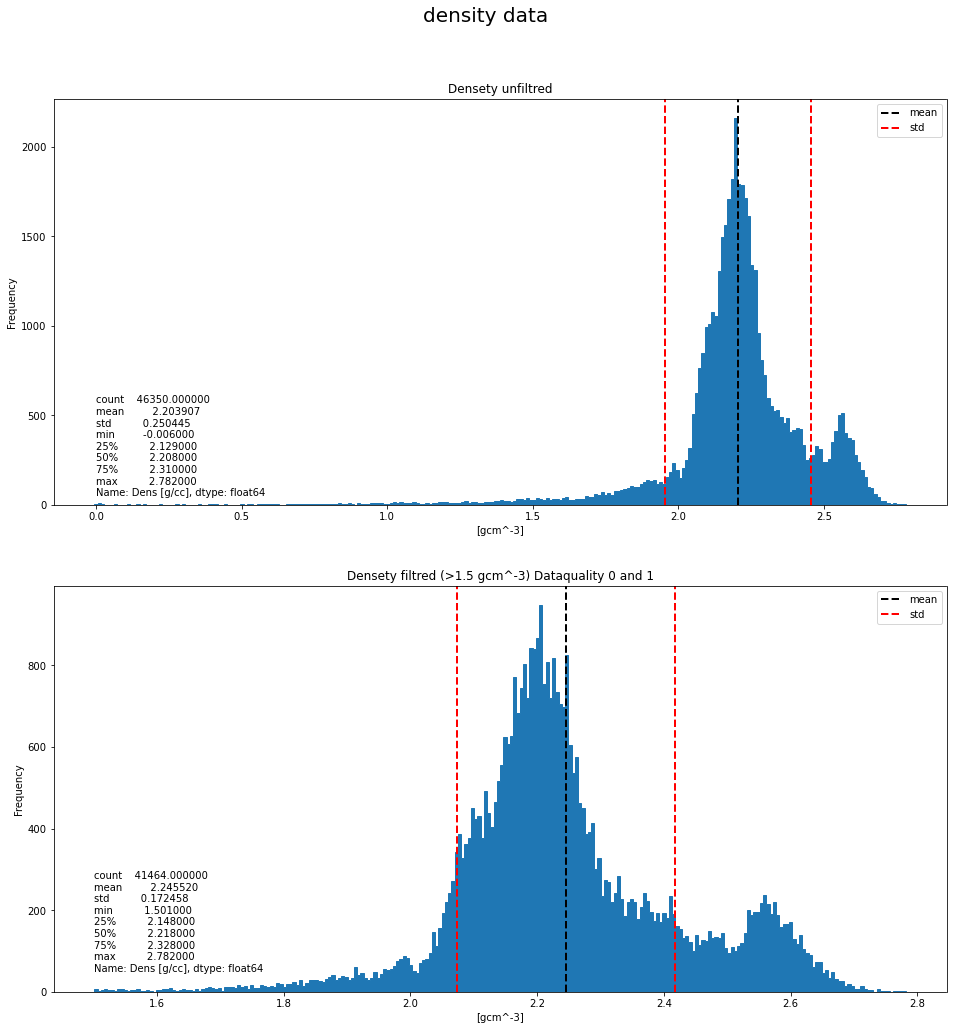

In [7]:
#histograms of overaLL densety data sets, with impact of filters and cleaning up (plot 0 = uncleand, 
#plot 1 = filtred, <1.5 g/cm3 rmoved, quality clas 0 and 1 (good to aceptebal data quality),and all nans removed)

#seting up the supplots
fig, ax = plt.subplots(2,1, figsize=(16,16))
fig.suptitle('density data',fontsize=20) 
#seting the position of the title
fig.subplots_adjust(top=0.9)

#Hiostogramm
ax[0].hist(dens_uf, bins=250,fill=True,histtype='step')#
ax[1].hist(dens_fc, bins=250, fill=True,histtype='step')#

#plot of the mean
ax[0].axvline(dens_uf.mean(), ls = '--',lw=2, color='k',label = 'mean')
ax[1].axvline(dens_fc.mean(), ls = '--',lw=2, color='k',label = 'mean')

#mean + std
ax[0].axvline(dens_uf.mean() + dens_uf.std(), ls = '--',lw=2, color='r',label = 'std')
ax[1].axvline(dens_fc.mean() + dens_fc.std(), ls = '--',lw=2, color='r',label = 'std')

#mean - std
ax[0].axvline(dens_uf.mean() - dens_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(dens_fc.mean() - dens_fc.std(),ls = '--',lw=2, color='r')

#plot titel
ax[0].set_title('Densety unfiltred')
ax[1].set_title('Densety filtred (>1.5 gcm^-3) Dataquality 0 and 1')

#x-axis label
ax[0].set_xlabel('[gcm^-3]')
ax[1].set_xlabel('[gcm^-3]')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# plots statistic overview of used data
ax[0].text (0,50,f'{dens_uf.describe()}')
ax[1].text (1.5,50,f'{dens_fc.describe()}')

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

### 2.3.3 Distribution histogramm of the over all magsus data

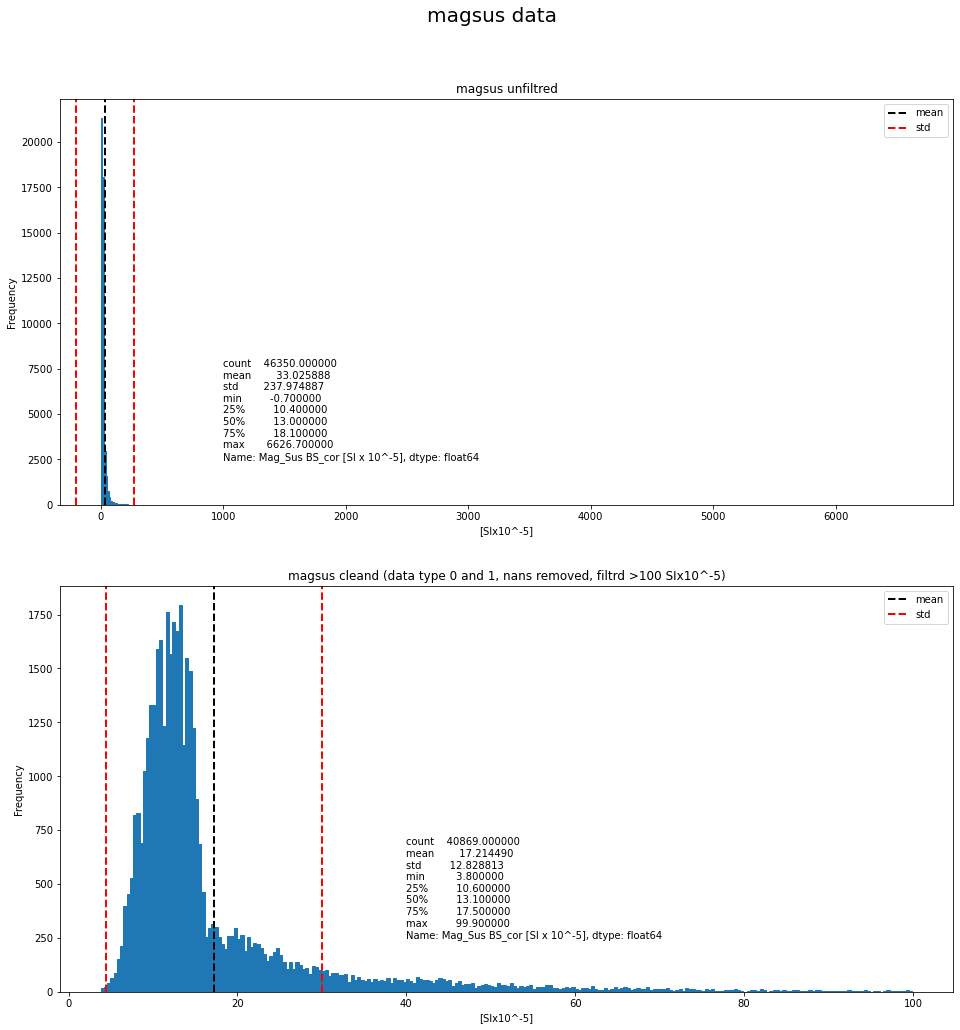

In [8]:
#histograms of overaLL magsus data sets, with impact of filters and cleaning up (plot 0 = uncleand, 
#plot 1 = filtred, <100 Six10^-5 removed, quality clas 0 and 1 (good to aceptebal data quality,and all nans removed))

#seting up the supplots
fig1, ax = plt.subplots(2,1, figsize=(16,16))
fig1.suptitle('magsus data',fontsize=20) 
#seting the position of the title
fig1.subplots_adjust(top=0.9)

#Hiostogramm
ax[0].hist(magsus_uf, bins=500,fill=True,histtype='step')#
ax[1].hist(magsus_fc, bins=250, fill=True,histtype='step')#

#plot of the mean
ax[0].axvline(magsus_uf.mean(), ls = '--',lw=2, color='k',label = 'mean')#mean
ax[1].axvline(magsus_fc.mean(), ls = '--',lw=2, color='k',label = 'mean')

#mean + std
ax[0].axvline(magsus_uf.mean() + magsus_uf.std(), ls = '--',lw=2, color='r',label = 'std')
ax[1].axvline(magsus_fc.mean() + magsus_fc.std(), ls = '--',lw=2, color='r',label = 'std')

#mean - std
ax[0].axvline(magsus_uf.mean() - magsus_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(magsus_fc.mean() - magsus_fc.std(),ls = '--',lw=2, color='r')

#plot titel
ax[0].set_title('magsus unfiltred')
ax[1].set_title('magsus cleand (data type 0 and 1, nans removed, filtrd >100 SIx10^-5)')

#x-axis label
ax[0].set_xlabel('[SIx10^-5]')
ax[1].set_xlabel('[SIx10^-5]')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# plots statistic overview of used data
ax[0].text (1000,2500,f'{magsus_uf.describe()}')
ax[1].text (40,250,f'{magsus_fc.describe()}')

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

### 2.3.4 Distribution histogramm of the over all nat gamma data

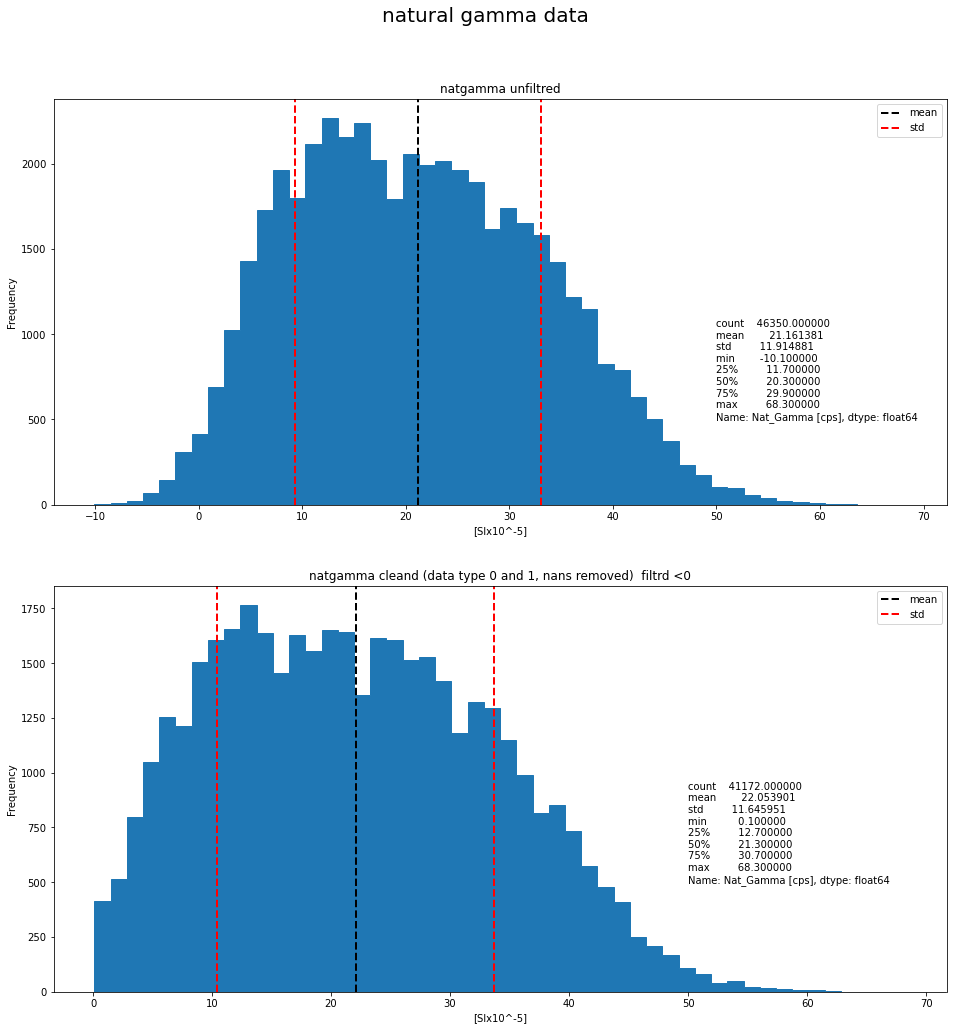

In [9]:
#histograms of overaLL nat gamma data sets, with impact of filters and cleaning up (plot 0 = uncleand, 
#plot 1 = quality clas 0 and 1 (good to aceptebal data quality,and all nans removed))

#seting up the supplots
fig2, ax = plt.subplots(2,1, figsize=(16,16))
fig2.suptitle('natural gamma data',fontsize=20) 
#seting the position of the title
fig2.subplots_adjust(top=0.9)


#Hiostogramm
ax[0].hist(natgamma_uf, bins=50,fill=True,histtype='step')
ax[1].hist(natgamma_fc, bins=50, fill=True,histtype='step')

#plot of the mean
ax[0].axvline(natgamma_uf.mean(), ls = '--',lw=2, color='k',label = 'mean')#mean
ax[1].axvline(natgamma_fc.mean(), ls = '--',lw=2, color='k',label = 'mean')

#mean + std
ax[0].axvline(natgamma_uf.mean() + natgamma_uf.std(), ls = '--',lw=2, color='r',label = 'std')
ax[1].axvline(natgamma_fc.mean() + natgamma_fc.std(), ls = '--',lw=2, color='r',label = 'std')

#mean - std
ax[0].axvline(natgamma_uf.mean() - natgamma_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(natgamma_fc.mean() - natgamma_fc.std(),ls = '--',lw=2, color='r')

#plot titel
ax[0].set_title('natgamma unfiltred')
ax[1].set_title('natgamma cleand (data type 0 and 1, nans removed)  filtrd <0')

#x-axis label
ax[0].set_xlabel('[SIx10^-5]')
ax[1].set_xlabel('[SIx10^-5]')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# plots statistic overview of used data
ax[0].text (50,500,f'{natgamma_uf.describe()}')
ax[1].text (50,500,f'{natgamma_fc.describe()}')

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

## 2.4 Distribution histogramm of the litho groups of the logs

### 2.4.1 Distribution histogramm of the litho groups of the density log

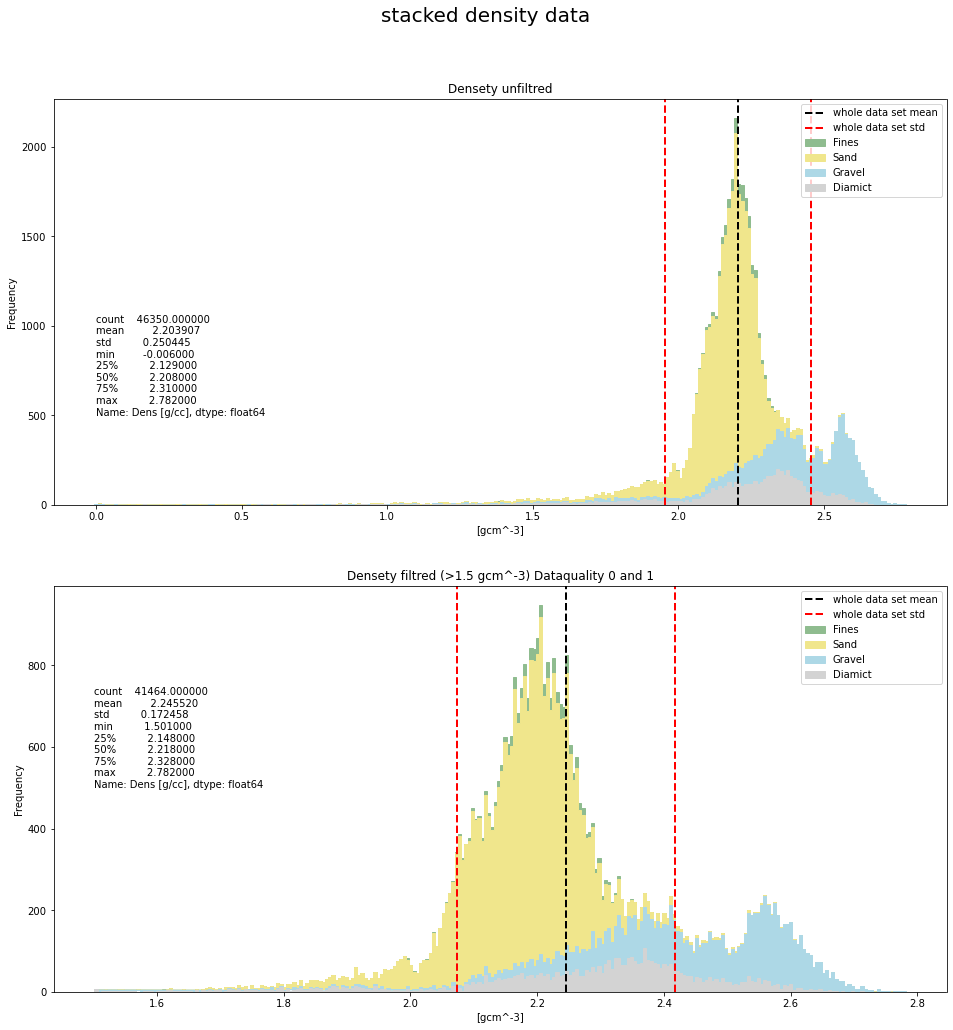

In [10]:
#stacked histograms of the densety data sets of the four main litho groups (Diamicts,Gravel, Sand, and Fines),
#with impact of filters and cleaning up (plot 0 = uncleand, plot 1 = filtred, <1.5 g/cm3 rmoved, plot 2 = quality 
#clas 0 and 1 (good to aceptebal data quality,and all nans removed)). Over all mean and std ration is plotted over the 
#histograms, the summary of the compleet data set is also provided in the plot

#seting up needed input
colors = ['lightgray','lightblue','khaki','darkseagreen']#color list
labels = ['Diamict','Gravel','Sand','Fines']#list of labels for subsets of histogramms

#seting up the supplots
fig3, ax = plt.subplots(2,1, figsize=(16,16))
fig3.suptitle('stacked density data',fontsize=20) 
#seting the position of the title
fig3.subplots_adjust(top=0.9)

#histogramm
ax[0].hist(dens_values_stacked_hist_uf, bins=250,fill=True,histtype='step', stacked=True, color=colors, label=labels)
ax[1].hist(dens_values_stacked_hist_fc, bins=250, fill=True,histtype='step',stacked=True, color=colors, label=labels)

#mean
ax[0].axvline(dens_uf.mean(), ls = '--',lw=2, color='k',label = 'whole data set mean')
ax[1].axvline(dens_fc.mean(), ls = '--',lw=2, color='k',label = 'whole data set mean')

#mean + std
ax[0].axvline(dens_uf.mean() + dens_uf.std(), ls = '--',lw=2, color='r',label = 'whole data set std')
ax[1].axvline(dens_fc.mean() + dens_fc.std(), ls = '--',lw=2, color='r',label = 'whole data set std')

#mean - std
ax[0].axvline(dens_uf.mean() - dens_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(dens_fc.mean() - dens_fc.std(),ls = '--',lw=2, color='r')

#plot titel
ax[0].set_title('Densety unfiltred')
ax[1].set_title('Densety filtred (>1.5 gcm^-3) Dataquality 0 and 1')

#x-axis label
ax[0].set_xlabel('[gcm^-3]')
ax[1].set_xlabel('[gcm^-3]')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# plots statistic overview of used data
ax[0].text (0,500,f'{dens_uf.describe()}') 
ax[1].text (1.5,500,f'{dens_fc.describe()}') 

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

#### 2.4.1.1 Normal distribution test of the overall density data

In [11]:
#normaleti test for the cleand overal densety data set
print('p-values from the normality tests on the cleand density data (D`Agostino-Pearson):')
k2, p = stats.normaltest(dens_fc) # D Agostino-Pearson
print('%10s %1.4f ' % ('P-value:',p))#printing the values

p-values from the normality tests on the cleand density data (D`Agostino-Pearson):
  P-value: 0.0000 


#### 2.4.1.2  Q-Q plot of the overall density data distribution

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Q-Q-plot of cleand density data set')

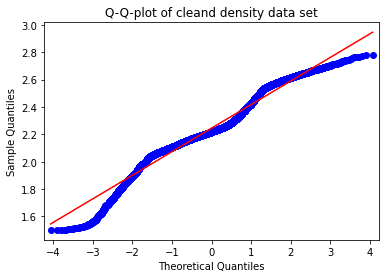

In [12]:
#Q-Q plot to visualise the distribution of the cleaned density data set
fig4 = sm.qqplot(dens_fc,line = 's')
plt.title('Q-Q-plot of cleand density data set')

### 2.4.2 Distribution histogramm of the litho groups of the mag sus log

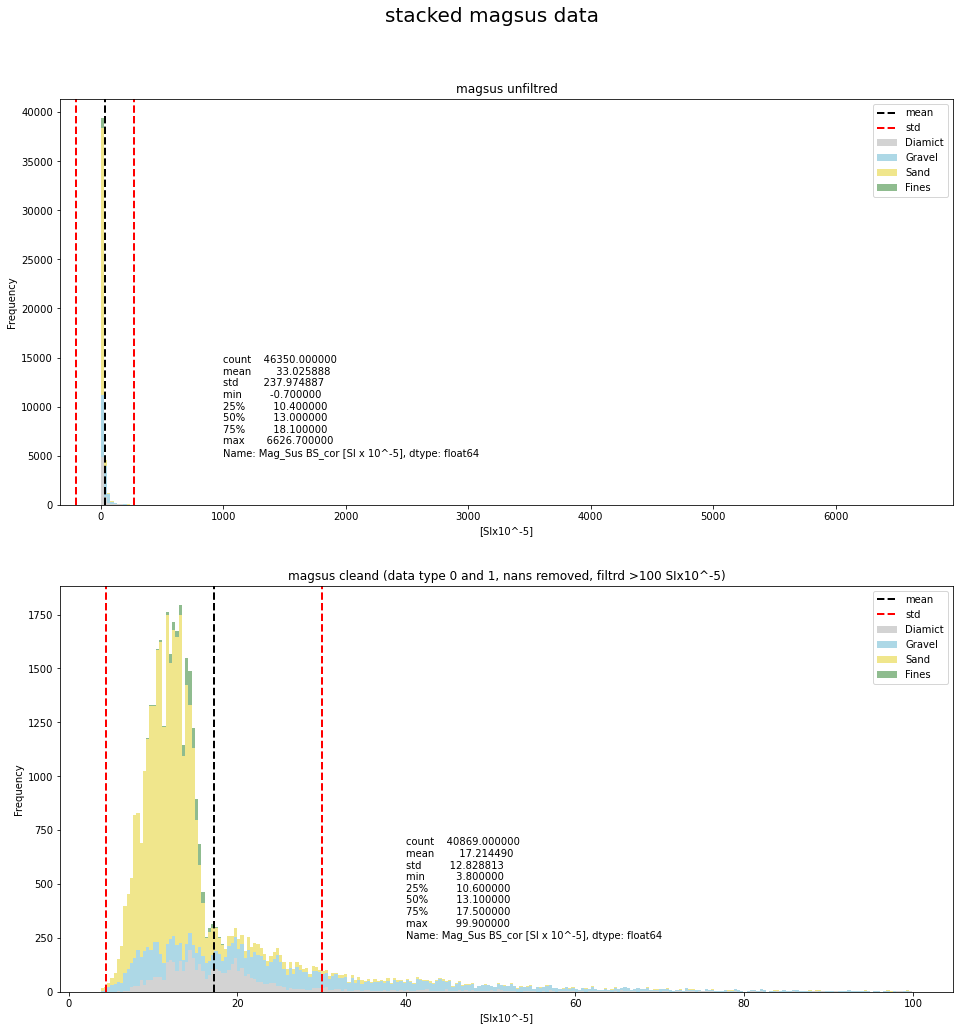

In [13]:
#stacked histograms of the magsus data sets of the four main litho groups (Diamicts,Gravel, Sand, and Fines),
#with impact of filters and cleaning up (plot 0 = uncleand, plot 1 = filtred, >100 SIx10^-5 rmoved,quality 
#clas 0 and 1 (good to aceptebal data quality,and all nans removed)). Over all mean and std ration and the
#coresponding normal distribution is plotted over the histograms, the summary of the compleet data set is also
#provided in the plot

colors = ['lightgray','lightblue','khaki','darkseagreen']#color list
labels = ['Diamict','Gravel','Sand','Fines']#list of labels for subsets of histogramms

#seting up the supplots
fig5, ax = plt.subplots(2,1, figsize=(16,16))
fig5.suptitle('stacked magsus data',fontsize=20) 
#seting the position of the title
fig5.subplots_adjust(top=0.9)

#histogramm
ax[0].hist(magsus_values_stacked_hist_uf, bins=250,fill=True,histtype='bar', stacked=True,color=colors, label=labels)
ax[1].hist(magsus_values_stacked_hist_fc, bins=250, fill=True,histtype='bar',stacked=True, color=colors, label=labels)

#plot of the mean
ax[0].axvline(magsus_uf.mean(), ls = '--',lw=2, color='k',label = 'mean')
ax[1].axvline(magsus_fc.mean(), ls = '--',lw=2, color='k',label = 'mean')

#mean + std
ax[0].axvline(magsus_uf.mean() + magsus_uf.std(), ls = '--',lw=2, color='r',label = 'std')
ax[1].axvline(magsus_fc.mean() + magsus_fc.std(), ls = '--',lw=2, color='r',label = 'std')

#mean - std
ax[0].axvline(magsus_uf.mean() - magsus_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(magsus_fc.mean() - magsus_fc.std(),ls = '--',lw=2, color='r')

#plot titel
ax[0].set_title('magsus unfiltred')
ax[1].set_title('magsus cleand (data type 0 and 1, nans removed, filtrd >100 SIx10^-5)')

#x-axis label
ax[0].set_xlabel('[SIx10^-5]')
ax[1].set_xlabel('[SIx10^-5]')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# plots statistic overview of used data
ax[0].text (1000,5000,f'{magsus_uf.describe()}')
ax[1].text (40,250,f'{magsus_fc.describe()}')

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

#### 2.4.2.1 Normal distribution test of the overall mag sus data

In [14]:
#normaleti test for the cleand overal densety data set
print('p-values from the normality tests on the cleand magsus data (D`Agostino-Pearson):')
k2, p = stats.normaltest(magsus_fc) # D Agostino-Pearson
print('%10s %1.4f ' % ('P-value:',p))#printing the values

p-values from the normality tests on the cleand magsus data (D`Agostino-Pearson):
  P-value: 0.0000 


#### 2.4.2.2  Q-Q plot of the overall mag sus data distribution

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Q-Q-plot of cleand magsus data set')

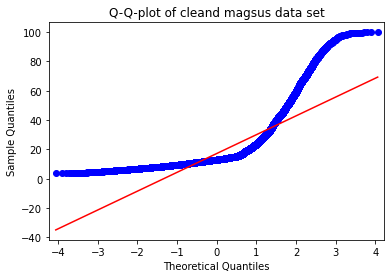

In [15]:
#Q-Q plot to visualise the distribution of the cleaned densety data set
fig6 = sm.qqplot(magsus_fc,line = 's')
plt.title('Q-Q-plot of cleand magsus data set')

### 2.4.3 Distribution histogramm of the litho groups of the nat gamma log

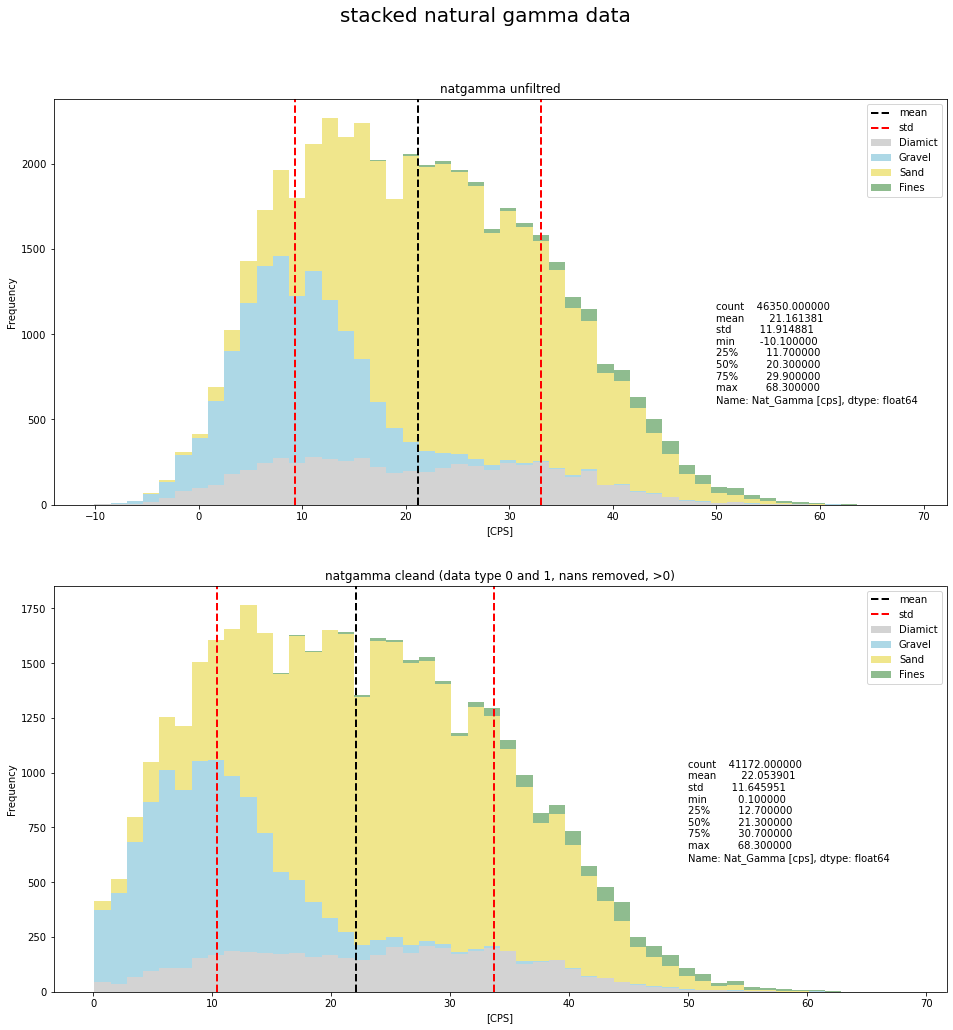

In [16]:
#stacked histograms of the natural gamma data sets of the four main litho groups (Diamicts,Gravel, Sand, and Fines),
#with impact of filters and cleaning up (plot 0 = uncleand, plot 1 = filtred, <0 removed, quality clas 0 and 1 (good to 
#aceptebal  data quality,and all nans removed)). Over all mean and std ration is  plotted over the histograms,
# the summary of the compleet data set is also provided in the plot

colors = ['lightgray','lightblue','khaki','darkseagreen']#color list
labels = ['Diamict','Gravel','Sand','Fines']#list of labels for subsets of histogramms

#seting up the supplots
fig7, ax = plt.subplots(2,1, figsize=(16,16))
fig7.suptitle('stacked natural gamma data',fontsize=20) 
#seting the position of the title
fig7.subplots_adjust(top=0.9)

#histogramm
ax[0].hist(natgamma_values_stacked_hist_uf, bins=50,fill=True,histtype='bar', stacked=True,color=colors, label=labels)
ax[1].hist(natgamma_values_stacked_hist_fc, bins=50, fill=True,histtype='bar',stacked=True,color=colors, label=labels)

#plot of the mean
ax[0].axvline(natgamma_uf.mean(), ls = '--',lw=2, color='k',label = 'mean')#mean
ax[1].axvline(natgamma_fc.mean(), ls = '--',lw=2, color='k',label = 'mean')

#mean + std
ax[0].axvline(natgamma_uf.mean() + natgamma_uf.std(), ls = '--',lw=2, color='r',label = 'std')
ax[1].axvline(natgamma_fc.mean() + natgamma_fc.std(), ls = '--',lw=2, color='r',label = 'std')

#mean - std
ax[0].axvline(natgamma_uf.mean() - natgamma_uf.std(),ls = '--',lw=2, color='r')
ax[1].axvline(natgamma_fc.mean() - natgamma_fc.std(),ls = '--',lw=2, color='r')

#plot titel
ax[0].set_title('natgamma unfiltred')
ax[1].set_title('natgamma cleand (data type 0 and 1, nans removed, >0)')

#x-axis label
ax[0].set_xlabel('[CPS]')
ax[1].set_xlabel('[CPS]')

#y axis label
ax[0].set_ylabel('Frequency')
ax[1].set_ylabel('Frequency')

# plots statistic overview of used data
ax[0].text (50,600,f'{natgamma_uf.describe()}')
ax[1].text (50,600,f'{natgamma_fc.describe()}')

#legend of plot
ax[0].legend(loc="upper right")
ax[1].legend(loc="upper right")

#### 2.4.3.1 Normal distribution test of the overall nat gamma data

In [17]:
#normaleti test for the cleand overal densety data set
print('p-values from the normality tests on the cleand natgamma data (D`Agostino-Pearson):')
k2, p = stats.normaltest(natgamma_fc) # D Agostino-Pearson
print('%10s %1.4f ' % ('P-value:',p))#printing the values

p-values from the normality tests on the cleand natgamma data (D`Agostino-Pearson):
  P-value: 0.0000 


#### 2.4.3.2  Q-Q plot of the overall nat gamma data distribution

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


Text(0.5, 1.0, 'Q-Q-plot of cleand nat gamma data set')

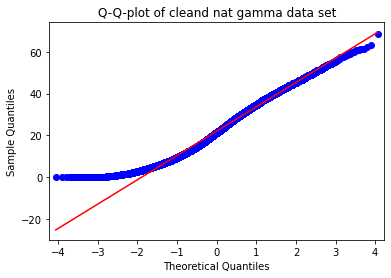

In [18]:
#Q-Q plot to visualise the distribution of the cleaned densety data set
fig8 = sm.qqplot(natgamma_fc,line = 's')
plt.title('Q-Q-plot of cleand nat gamma data set')

## 2.5 Induvidual distribution histogramm of the litho groups of the logs

### 2.5.1 Induvidual distribution histogramm of the litho groups of the density log

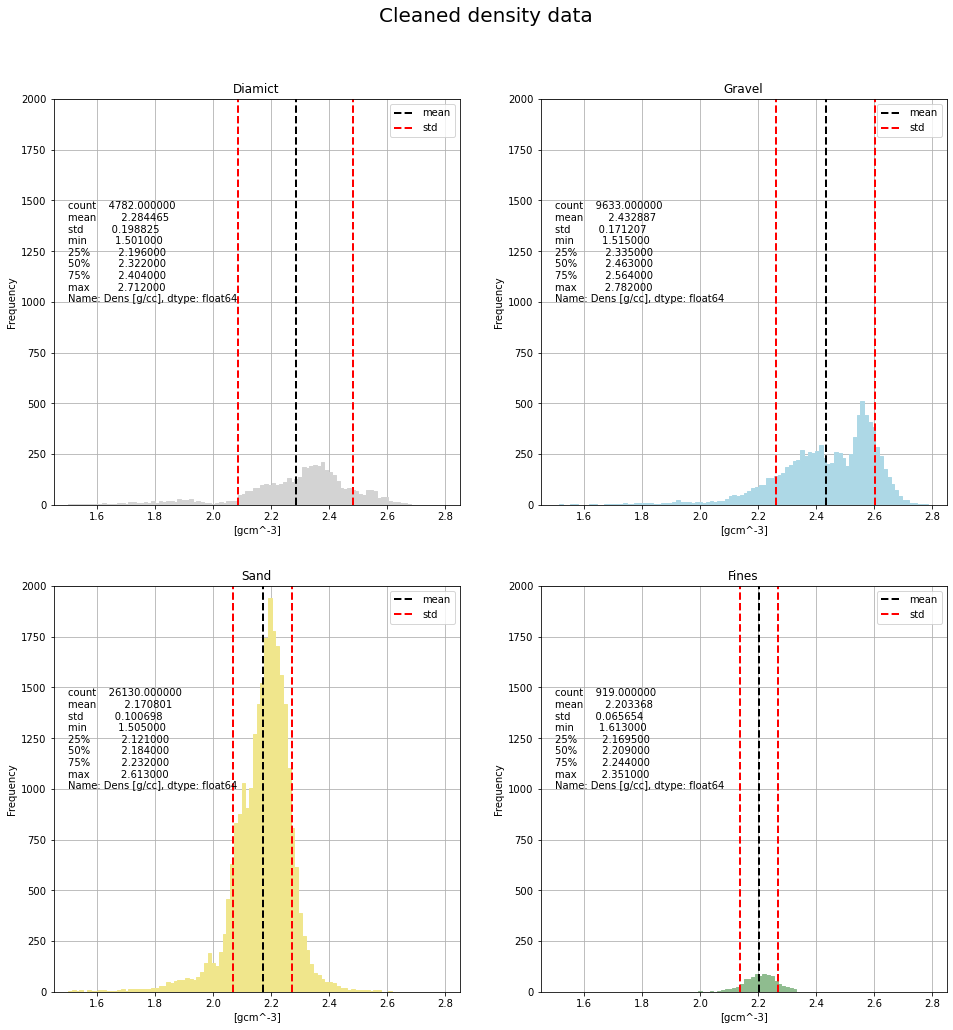

In [19]:
#induvidual histogramms of the cleand densety data of the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])
#Mean and std ration and the coresponding normal distribution is plotted over the histograms, the summary of the each sub
#data set is also provided in the plot

#seting up the supplots
fig9, ax = plt.subplots(2,2, figsize=(16,16))
#main plot title
fig9.suptitle('Cleaned density data',fontsize=20) 
#seting the position of the title
fig9.subplots_adjust(top=0.9)

c=0#counter
for i in range(2):#iterating over the columnes
    for j in range (2):#iterating over the rows
        #histogramm
        ax[i][j].hist(dens_values_stacked_hist_fc[c], bins=100,range=(1.5,2.8),fill=True,histtype='step',
                      stacked = True,color=colors[c])
        #mean
        ax[i][j].axvline(dens_values_stacked_hist_fc[c].mean(), ls = '--',lw=2, color='k',label = 'mean')
        #mean+std
        ax[i][j].axvline(dens_values_stacked_hist_fc[c].mean() + dens_values_stacked_hist_fc[c].std(),
                         ls = '--',lw=2, color='r',label = 'std')
        #mean-std
        ax[i][j].axvline(dens_values_stacked_hist_fc[c].mean() - dens_values_stacked_hist_fc[c].std(), ls = '--',
                         lw=2, color='r')        
        ax[i][j].text (1.5,1000,f'{dens_values_stacked_hist_fc[c].describe()}')#statistical summary of subdata set
        ax[i][j].set_title(labels[c]) #titel          
        ax[i][j].set_ylabel('Frequency')#y-axis label
        ax[i][j].set_xlabel('[gcm^-3]')#x-axis label
        ax[i][j].set_ylim([0, 2000])#y-axis limits        
        ax[i][j].set_xlim([1.45, 2.85])#x-axis limits  
        ax[i][j].grid()#grid
        ax[i][j].legend(loc="upper right")#legend
        c=c+1#ubdating counter after each iteration
        
#ploting normal distribution based on mean and std of each main lihto clas
#ax[0][0].plot(np.sort(dens_d_fc.to_numpy()),
#              scipy.stats.norm.pdf(np.sort(dens_d_fc.to_numpy()),dens_d_fc.mean(),dens_d_fc.std()),
#              '-k', label = 'normal dist')        

#### 2.5.1.1 Normal distribution test of the induvidual density data sets

In [20]:
#calculating the p-values of the normalety test (D`Agostino-Pearson) of the density data for each main litho clas
print('p-values from the normality tests on the density data of the four main lithology clases (D`Agostino-Pearson):')
dens_p_values = np.zeros(len(dens_values_stacked_hist_fc))#preloacting the p values
for i in range(len(dens_values_stacked_hist_fc)):
    k2, p = stats.normaltest(dens_values_stacked_hist_fc[i])# D Agostino-Pearson test, p = p-values, k2-> chi^2
    dens_p_values[i] = p#adding the p-value to the list
    print('%10s %1.4f ' % (labels[i],p))#printing the values

p-values from the normality tests on the density data of the four main lithology clases (D`Agostino-Pearson):
   Diamict 0.0000 
    Gravel 0.0000 
      Sand 0.0000 
     Fines 0.0000 


#### 2.5.1.2  Q-Q plot of the induvidual density data sets

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

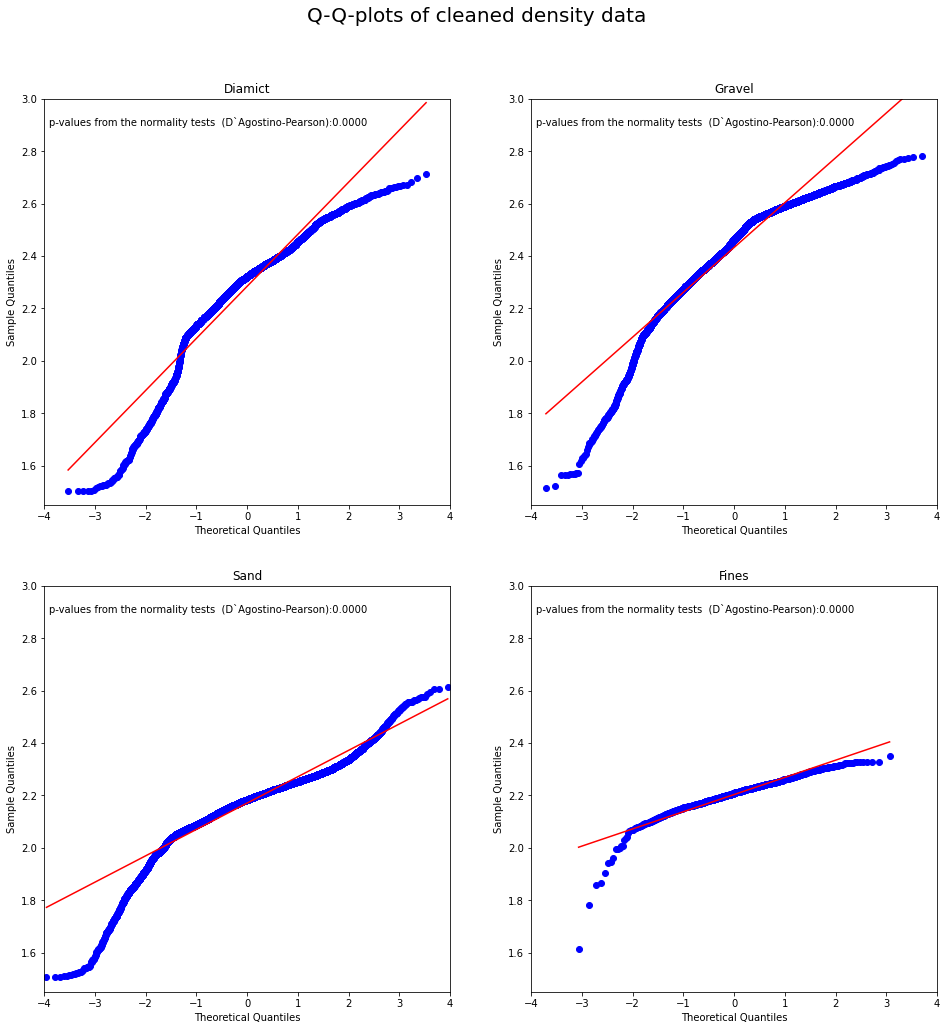

In [21]:
#creatiing the qq plots of density data the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])

#seting up the supplots
fig10, ax = plt.subplots(2,2, figsize=(16,16))
fig10.suptitle('Q-Q-plots of cleaned density data',fontsize=20) 
#seting the position of the title
fig10.subplots_adjust(top=0.9)

#creatiing the qq plots 
c=0#counter for list index for needed input
for i in range (2):#loops over columne index
    for j in range(2):#loops over the row indexes
        fig10 = sm.qqplot(dens_values_stacked_hist_fc[c],line = 's', ax= ax[i][j])#q-qplot
        ax[i][j].set_title(labels[c])#titel
        ax[i][j].set_ylim([1.45, 3])#y-axis limits
        ax[i][j].set_xlim([-4,4])#x-xaxis limits
        #plots the results of the D`Agostino-Pearson test
        ax[i][j].text (-3.9,2.9,f'p-values from the normality tests  (D`Agostino-Pearson):{dens_p_values[c]:.4f}')
        c=c+1#ubdates counter after each iteration 

#### 2.5.1.3  Kruskal-Wallis-test of the four sub data sets of the density log

In [22]:
#kruskal test of the four supsets of the density data
dens_stast, dens_p = stats.kruskal(dens_values_stacked_hist_fc[0],dens_values_stacked_hist_fc[1],
                                   dens_values_stacked_hist_fc[2],dens_values_stacked_hist_fc[3])
print(f'stats: {dens_stast:.4f}',f'p-value kruskal: {dens_p:.4f}' )

stats: 16010.2519 p-value kruskal: 0.0000


#### 2.5.1.4  Mann-Whitney-U-test of the pair-wise comparison of the density sub data sets

In [23]:
#comparsion of each combination of the subdata sets of the nat density in a mannwithneyu-test
#prelocating the later produced data
p_value_dens = np.zeros(len(dens_values_stacked_hist_fc)**2)#p-value
stats_dens = np.zeros(len(dens_values_stacked_hist_fc)**2)#statistics
compe_litho_dens = np.chararray((len(dens_values_stacked_hist_fc)**2),itemsize=3, unicode=True)#compearsion labels
x = 0#counter
#for-loop to iterate each lithotype with each lithotype, to produce all possible combinations (n^2),
#compearsion with tis self should be 1 (as control)
for i in range(len(dens_values_stacked_hist_fc)):#first loop
    for j in range(len(dens_values_stacked_hist_fc)):#second loop
        #mannwhitneyu-test
        stat, p = stats.mannwhitneyu(dens_values_stacked_hist_fc[i],dens_values_stacked_hist_fc[j], alternative='two-sided')
        p_value_dens[x] = p#saving the p-value
        stats_dens[x] = stat#saving the stats
        compe_litho_dens[x] = labels[i] +'-'+labels[j]#saving the combination of the compared elements
        #prints the output after each iteration
        print(f'p-value: {p:.4f}',f'stats: {stat:.4f}',f'compearsion: {labels[i]}-{labels[j]}')
        x =x+1#updates counter after each iteration

p-value: 1.0000 stats: 11433762.0000 compearsion: Diamict-Diamict
p-value: 0.0000 stats: 12322264.0000 compearsion: Diamict-Gravel
p-value: 0.0000 stats: 94877068.5000 compearsion: Diamict-Sand
p-value: 0.0000 stats: 3198719.0000 compearsion: Diamict-Fines
p-value: 0.0000 stats: 33742742.0000 compearsion: Gravel-Diamict
p-value: 1.0000 stats: 46397344.5000 compearsion: Gravel-Gravel
p-value: 0.0000 stats: 229586797.5000 compearsion: Gravel-Sand
p-value: 0.0000 stats: 7977577.0000 compearsion: Gravel-Fines
p-value: 0.0000 stats: 30076591.5000 compearsion: Sand-Diamict
p-value: 0.0000 stats: 22123492.5000 compearsion: Sand-Gravel
p-value: 1.0000 stats: 341388450.0000 compearsion: Sand-Sand
p-value: 0.0000 stats: 9377135.0000 compearsion: Sand-Fines
p-value: 0.0000 stats: 1195939.0000 compearsion: Fines-Diamict
p-value: 0.0000 stats: 875150.0000 compearsion: Fines-Gravel
p-value: 0.0000 stats: 14636335.0000 compearsion: Fines-Sand
p-value: 1.0000 stats: 422280.5000 compearsion: Fines-Fine

### 2.5.2 Induvidual distribution histogramm of the litho groups of the mag sus log

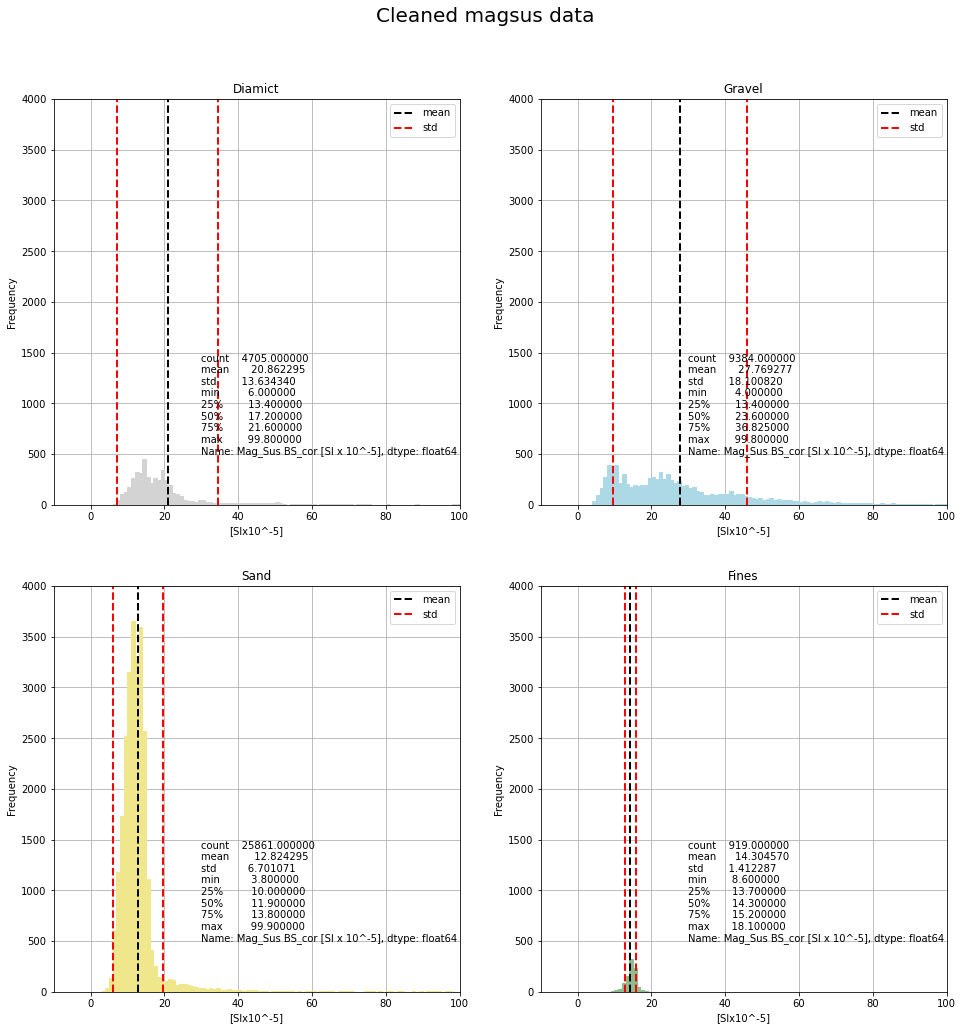

In [24]:
#induvidual histogramms of the cleand magsus data of the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])
#Mean and std ration and the coresponding normal distribution is plotted over the histograms, the summary of the each sub
#data set is also provided in the plot


#seting up the supplots
fig11, ax = plt.subplots(2,2, figsize=(16,16))
#main plot title
fig11.suptitle('Cleaned magsus data',fontsize=20) 
#seting the position of the title
fig11.subplots_adjust(top=0.9)

c=0#counter
for i in range(2):#iterating over the columnes
    for j in range (2):#iterating over the rows
        #histogramm
        ax[i][j].hist(magsus_values_stacked_hist_fc[c], bins=100,range=(0,100),fill=True,histtype='step',
                      stacked = True,color=colors[c])
        #mean
        ax[i][j].axvline(magsus_values_stacked_hist_fc[c].mean(), ls = '--',lw=2, color='k',label = 'mean')
        #mean+std
        ax[i][j].axvline(magsus_values_stacked_hist_fc[c].mean() + magsus_values_stacked_hist_fc[c].std(),
                         ls = '--',lw=2, color='r',label = 'std')
        #mean-std
        ax[i][j].axvline(magsus_values_stacked_hist_fc[c].mean() - magsus_values_stacked_hist_fc[c].std(), ls = '--',
                         lw=2, color='r')
        ax[i][j].text (30,500,f'{magsus_values_stacked_hist_fc[c].describe()}')#statistical summary of subdata set
        ax[i][j].set_title(labels[c]) #titel          
        ax[i][j].set_ylabel('Frequency')#y-axis label
        ax[i][j].set_xlabel('[SIx10^-5]')#x-axis label
        ax[i][j].set_ylim([0, 4000])#y-axis limits        
        ax[i][j].set_xlim([-10, 100])#x-axis limits   
        ax[i][j].grid()#grid
        ax[i][j].legend(loc="upper right")#legend
        c=c+1#ubdating counter after each iteration
        
        
#ploting normal distribution based on mean and std of each main lihto clas
#ax[0][0].plot(np.sort(magsus_d_fc.to_numpy()),
              #scipy.stats.norm.pdf(np.sort(magsus_d_fc.to_numpy()),magsus_d_fc.mean(),magsus_d_fc.std()),
              #'-k', label = 'normal dist')       

#### 2.5.2.1 Normal distribution test of the induvidual mag sus data sets

In [25]:
#calculating the p-values of the normalety test (D`Agostino-Pearson) of the densety data for each main litho clas
print('p-values from the normality tests on the magsus data of the four main lithology clases (D`Agostino-Pearson):')
magsus_p_values = np.zeros(len(magsus_values_stacked_hist_fc))#preloacting the p values
#looping over each sub-data set to doe the D`Agostino-Pearson test of each sub-data set
for i in range(len(magsus_values_stacked_hist_fc)):
    k2, p = stats.normaltest(magsus_values_stacked_hist_fc[i])# D Agostino-Pearson test, p = p-values, k2-> chi^2
    magsus_p_values[i] = p#adding the p-value to the list
    print('%10s %1.4f ' % (labels[i],p))#printing the values

p-values from the normality tests on the magsus data of the four main lithology clases (D`Agostino-Pearson):
   Diamict 0.0000 
    Gravel 0.0000 
      Sand 0.0000 
     Fines 0.0000 


#### 2.5.1.2  Q-Q plot of the induvidual mag sus data sets

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

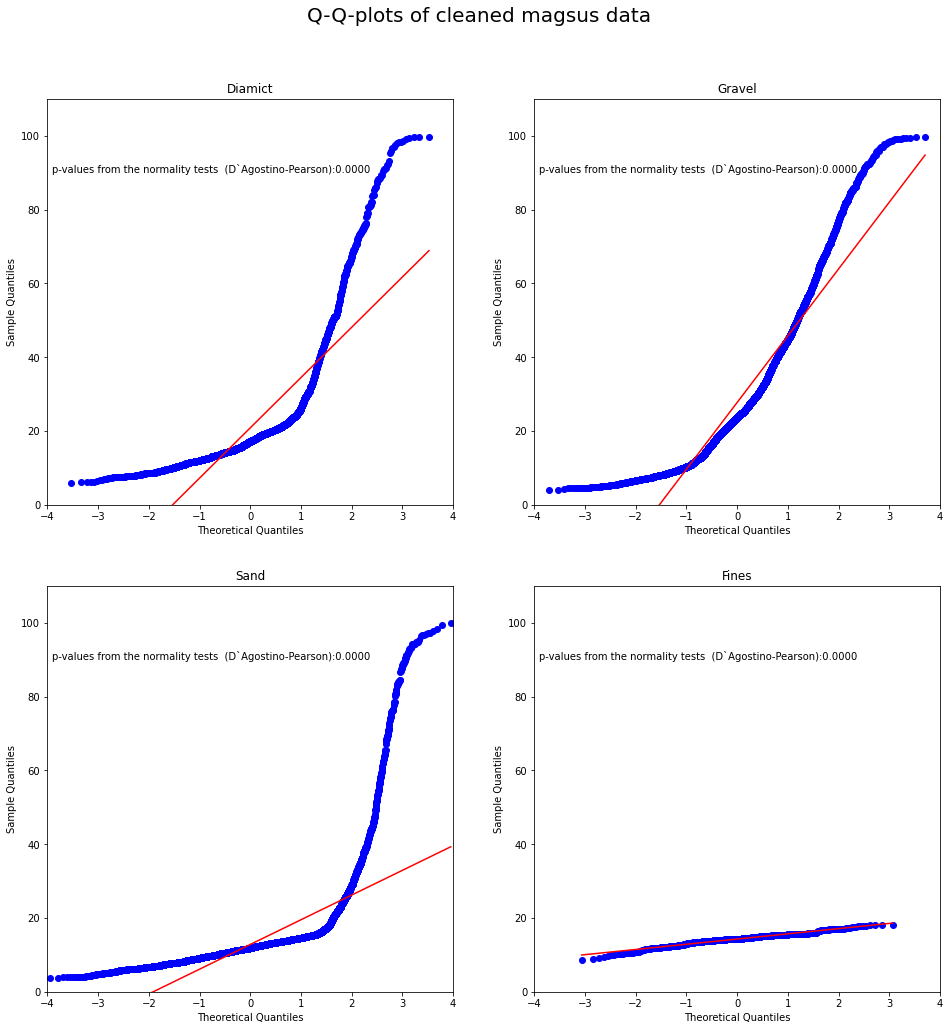

In [26]:
#creatiing the qq plots of magsus data the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])

#seting up the supplots
fig12, ax = plt.subplots(2,2, figsize=(16,16))
fig12.suptitle('Q-Q-plots of cleaned magsus data',fontsize=20) 
#seting the position of the title
fig12.subplots_adjust(top=0.9)

#creatiing the qq plots 
c=0#counter for list index for needed input
for i in range (2):#loops over columne index
    for j in range(2):#loops over the row indexes
        fig10 = sm.qqplot(magsus_values_stacked_hist_fc[c],line = 's', ax= ax[i][j])#q-qplot
        ax[i][j].set_title(labels[c])#titel
        ax[i][j].set_ylim([0, 110])#y-axis limits
        ax[i][j].set_xlim([-4,4])#x-xaxis limits
        #plots the results of the D`Agostino-Pearson test
        ax[i][j].text (-3.9,90,f'p-values from the normality tests  (D`Agostino-Pearson):{magsus_p_values[c]:.4f}')
        c=c+1#ubdates counter after each iteration

#### 2.5.2.3  Kruskal-Wallis-test of the four sub data sets of the mag sus log

In [27]:
#kruskal test of the four supsets of the magsus data
magsus_stast, magsus_p = stats.kruskal(magsus_values_stacked_hist_fc[0],magsus_values_stacked_hist_fc[1],
                                      magsus_values_stacked_hist_fc[2],magsus_values_stacked_hist_fc[3])
print(f'stats: {magsus_stast:.4f}',f'p-value kruskal: {magsus_p:.4f}' )

stats: 9576.2385 p-value kruskal: 0.0000


#### 2.5.2.4  Mann-Whitney-U-test of the pair-wise comparison of the mag sus sub data sets

In [28]:
#comparsion of each combination of the subdata sets of the magsus data in a mannwithneyu-test
#prelocating the later produced data
p_value_magsus = np.zeros(len(magsus_values_stacked_hist_fc)**2)#p-value
stats_magsus = np.zeros(len(magsus_values_stacked_hist_fc)**2)#statistics
compe_litho_magsus = np.chararray((len(magsus_values_stacked_hist_fc)**2),itemsize=25, unicode=True)#compearsion labels
x = 0#counter
#for-loop to iterate each lithotype with each lithotype, to produce all possible combinations (n^2),
#compearsion with tis self should be 1 (as control)
for i in range(len(magsus_values_stacked_hist_fc)):#first loop
    for j in range(len(magsus_values_stacked_hist_fc)):#second loop
        #mannwhitneyu-test
        stat, p = stats.mannwhitneyu(magsus_values_stacked_hist_fc[i],magsus_values_stacked_hist_fc[j],
                                     alternative='two-sided')
        p_value_magsus[x] = p#saving the p-value
        stats_magsus[x] = stat#saving the stats
        compe_litho_magsus[x] = labels[i] +'-'+labels[j]#saving the combination of the compared elements
        #prints the output after each iteration
        print(f'p-value:{p:.4f}',f'stats:{stat:.4f}',f'{labels[i]}-{labels[j]}')
        x =x+1#updates counter after each iteration

p-value:1.0000 stats:11068512.5000 Diamict-Diamict
p-value:0.0000 stats:16852529.0000 Diamict-Gravel
p-value:0.0000 stats:96802283.5000 Diamict-Sand
p-value:0.0000 stats:2924317.0000 Diamict-Fines
p-value:0.0000 stats:27299191.0000 Gravel-Diamict
p-value:1.0000 stats:44029728.0000 Gravel-Gravel
p-value:0.0000 stats:190529630.5000 Gravel-Sand
p-value:0.0000 stats:6333335.5000 Gravel-Fines
p-value:0.0000 stats:24873721.5000 Sand-Diamict
p-value:0.0000 stats:52149993.5000 Sand-Gravel
p-value:1.0000 stats:334395660.5000 Sand-Sand
p-value:0.0000 stats:5248698.5000 Sand-Fines
p-value:0.0000 stats:1399578.0000 Fines-Diamict
p-value:0.0000 stats:2290560.5000 Fines-Gravel
p-value:0.0000 stats:18517560.5000 Fines-Sand
p-value:1.0000 stats:422280.5000 Fines-Fines


### 2.5.3 Induvidual distribution histogramm of the litho groups of the nat gamma log

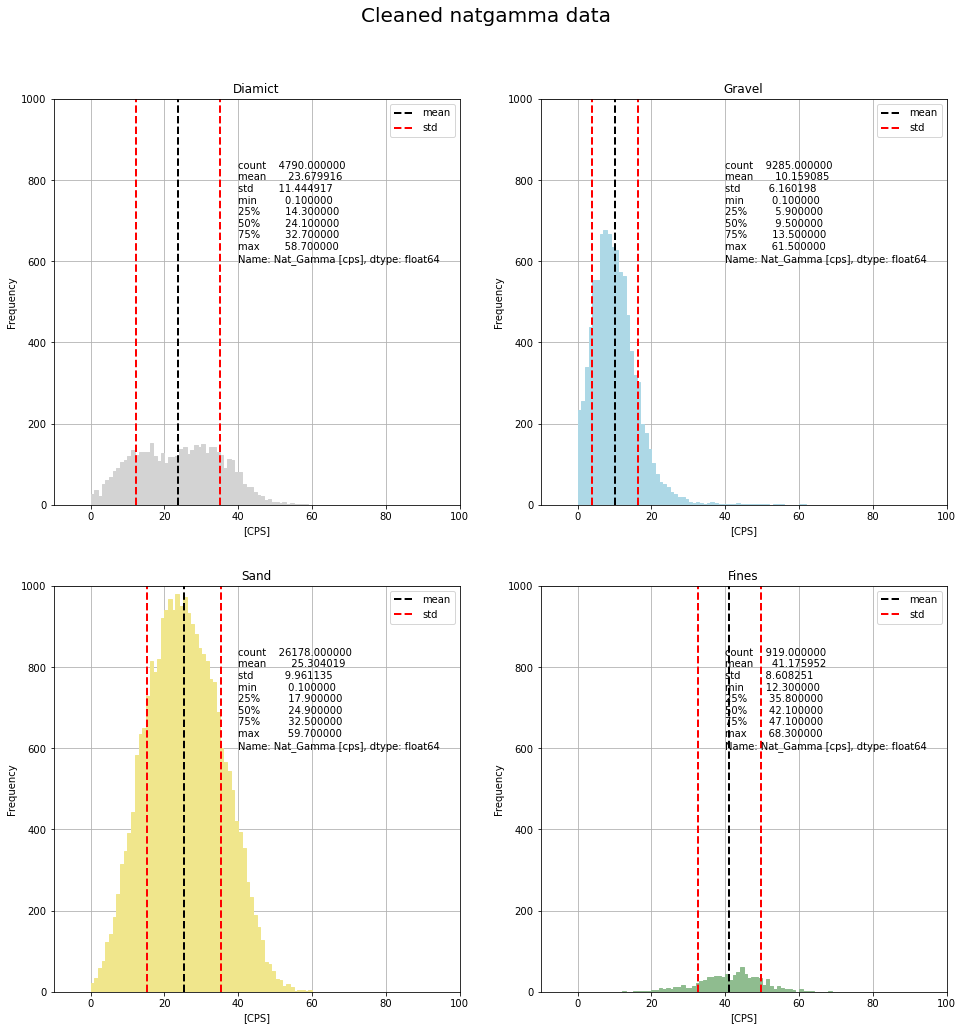

In [29]:
#induvidual histogramms of the cleand natgamma data of the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])
#Mean and std ration and the coresponding normal distribution is plotted over the histograms, the summary of the each sub
#data set is also provided in the plot

#seting up the supplots
fig13, ax = plt.subplots(2,2, figsize=(16,16))
#main plot title
fig13.suptitle('Cleaned natgamma data',fontsize=20) 
#seting the position of the title
fig13.subplots_adjust(top=0.9)

c=0#counter for list index
for i in range(2):#iterating over the columnes
    for j in range (2):#iterating over the rows
        #plots
        #histogramm
        ax[i][j].hist(natgamma_values_stacked_hist_fc[c], bins=100,range=(0,100),fill=True,histtype='step',
                      stacked = True,color=colors[c])
        #mean
        ax[i][j].axvline(natgamma_values_stacked_hist_fc[c].mean(), ls = '--',lw=2, color='k',label = 'mean')
        #mean+std
        ax[i][j].axvline(natgamma_values_stacked_hist_fc[c].mean() + natgamma_values_stacked_hist_fc[c].std(),
                         ls = '--',lw=2, color='r',label = 'std')
        #mean-std
        ax[i][j].axvline(natgamma_values_stacked_hist_fc[c].mean() - natgamma_values_stacked_hist_fc[c].std(), ls = '--',
                         lw=2, color='r')
        #seting of plot
        ax[i][j].text (40,600,f'{natgamma_values_stacked_hist_fc[c].describe()}')#statistical summary of subdata set
        ax[i][j].set_title(labels[c])   #titel     
        ax[i][j].set_ylabel('Frequency')#y-axis label
        ax[i][j].set_xlabel('[CPS]')#x-axis label
        ax[i][j].set_ylim([0, 1000])  #y-axis limits      
        ax[i][j].set_xlim([-10, 100])#x-axis limits  
        ax[i][j].grid()#grid
        ax[i][j].legend(loc="upper right")#legend
        c=c+1#ubdating counter after each iteration


#ploting normal distribution based on mean and std of each main lihto clas
#ax[0][0].plot(np.sort(natgamma_d_fc.to_numpy()),
              #scipy.stats.norm.pdf(np.sort(natgamma_d_fc.to_numpy()),natgamma_d_fc.mean(),natgamma_d_fc.std()),
              #'-k', label = 'normal dist')



#### 2.5.3.1 Normal distribution test of the induvidual nat gamma data sets

In [30]:
#calculating the p-values of the normalety test (D`Agostino-Pearson) of the densety data for each main litho clas
print('p-values from the normality tests on the natgamma data of the four main lithology clases (D`Agostino-Pearson):')
natgamma_p_values = np.zeros(len(natgamma_values_stacked_hist_fc))#preloacting the p values
#looping over each sub-data set to doe the D`Agostino-Pearson test of each sub-data set
for i in range(len(natgamma_values_stacked_hist_fc)):
    k2, p = stats.normaltest(natgamma_values_stacked_hist_fc[i]) # D Agostino-Pearson test, p = p-values, k2-> chi^2
    natgamma_p_values[i] = p#adding the p-value to the list
    print('%10s %1.4f ' % (labels[i],p))#printing the values

p-values from the normality tests on the natgamma data of the four main lithology clases (D`Agostino-Pearson):
   Diamict 0.0000 
    Gravel 0.0000 
      Sand 0.0000 
     Fines 0.0003 


#### 2.5.3.2  Q-Q plot of the induvidual nat gamma data sets

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt str

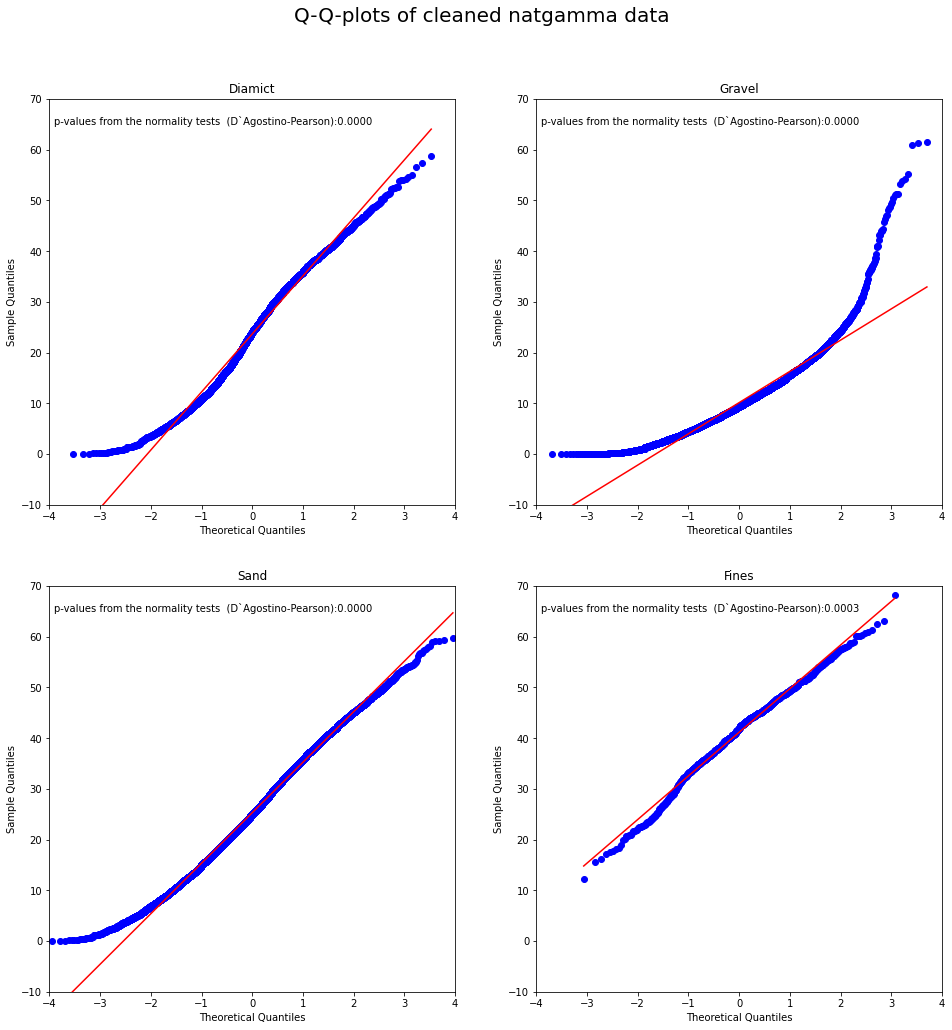

In [31]:
#creatiing the qq plots of natgamma data the four main litho types:
#(diamicts [0][0],gravel [0][1],Sand[1][0], and fines [1][1])

#seting up the supplots
fig14, ax = plt.subplots(2,2, figsize=(16,16))
fig14.suptitle('Q-Q-plots of cleaned natgamma data',fontsize=20) 
#seting the position of the title
fig14.subplots_adjust(top=0.9)

#creatiing the qq plots 
c=0#counter for list index for needed input
for i in range (2):#loops over columne index
    for j in range(2):#loops over the row indexes
        fig10 = sm.qqplot(natgamma_values_stacked_hist_fc[c],line = 's', ax= ax[i][j])#q-qplot
        ax[i][j].set_title(labels[c])#titel
        ax[i][j].set_ylim([-10, 70])#y-axis limits
        ax[i][j].set_xlim([-4,4])#x-xaxis limits
        #plots the results of the D`Agostino-Pearson test
        ax[i][j].text (-3.9,65,f'p-values from the normality tests  (D`Agostino-Pearson):{natgamma_p_values[c]:.4f}')
        c=c+1#ubdates counter after each iteration

#### 2.5.3.3  Kruskal-Wallis-test of the four sub data sets of the nat gamma log

In [32]:
#kruskal test of the four supsets of the nat gamma data
natgamma_stast, natgamma_p = stats.kruskal(natgamma_values_stacked_hist_fc[0],natgamma_values_stacked_hist_fc[1],
                                           natgamma_values_stacked_hist_fc[2],natgamma_values_stacked_hist_fc[3])
print(f'stats: {natgamma_stast:.4f}',f'p-value kruskal: {natgamma_p:.4f}' )

stats: 14837.6648 p-value kruskal: 0.0000


#### 2.5.3.4  Mann-Whitney-U-test of the pair-wise comparison of the nat gamma sub data sets

In [33]:
#comparsion of each combination of the subdata sets of the nat gamma data in a mannwithneyu-test
#prelocating the later produced data
p_value_natgamma = np.zeros(len(natgamma_values_stacked_hist_fc)**2)#p-value
stats_natgamma = np.zeros(len(natgamma_values_stacked_hist_fc)**2)#statistics
compe_litho_natgamma = np.chararray((len(natgamma_values_stacked_hist_fc)**2),itemsize=25, unicode=True)#comparsion labels
x = 0#counter
#for-loop to iterate each lithotype with each lithotype, to produce all possible combinations (n^2),
#comparsion with tis self should be 1 (as control)
for i in range(len(natgamma_values_stacked_hist_fc)):#first loop
    for j in range(len(natgamma_values_stacked_hist_fc)):#second loop
        #mannwhitneyu-test
        stat, p = stats.mannwhitneyu(natgamma_values_stacked_hist_fc[i],natgamma_values_stacked_hist_fc[j], alternative='two-sided')
        p_value_natgamma[x] = p#saving the p-value
        stats_natgamma[x] = stat#saving the stats
        compe_litho_natgamma[x] = labels[i] +'-'+ labels[j]#saving the combination of the compared elements
        #prints the output after each iteration
        print(f'p-value mannwith :{p:.4f}',f'stats:{stat:.4f}',f'comparsion:{labels[i]}-{labels[j]}')
        #updates counter after each iteration
        x =x+1

p-value mannwith :1.0000 stats:11472050.0000 comparsion:Diamict-Diamict
p-value mannwith :0.0000 stats:37414486.5000 comparsion:Diamict-Gravel
p-value mannwith :0.0000 stats:57699840.0000 comparsion:Diamict-Sand
p-value mannwith :0.0000 stats:507147.0000 comparsion:Diamict-Fines
p-value mannwith :0.0000 stats:7060663.5000 comparsion:Gravel-Diamict
p-value mannwith :1.0000 stats:43105612.5000 comparsion:Gravel-Gravel
p-value mannwith :0.0000 stats:23139053.5000 comparsion:Gravel-Sand
p-value mannwith :0.0000 stats:50951.0000 comparsion:Gravel-Fines
p-value mannwith :0.0000 stats:67692780.0000 comparsion:Sand-Diamict
p-value mannwith :0.0000 stats:219923676.5000 comparsion:Sand-Gravel
p-value mannwith :1.0000 stats:342643842.0000 comparsion:Sand-Sand
p-value mannwith :0.0000 stats:2848827.0000 comparsion:Sand-Fines
p-value mannwith :0.0000 stats:3894863.0000 comparsion:Fines-Diamict
p-value mannwith :0.0000 stats:8481964.0000 comparsion:Fines-Gravel
p-value mannwith :0.0000 stats:2120875

### 2.6 Poxplots of sub-datasets of logs

#### 2.6.1 Density data

Text(0, 0.5, '[gcm^-3]')

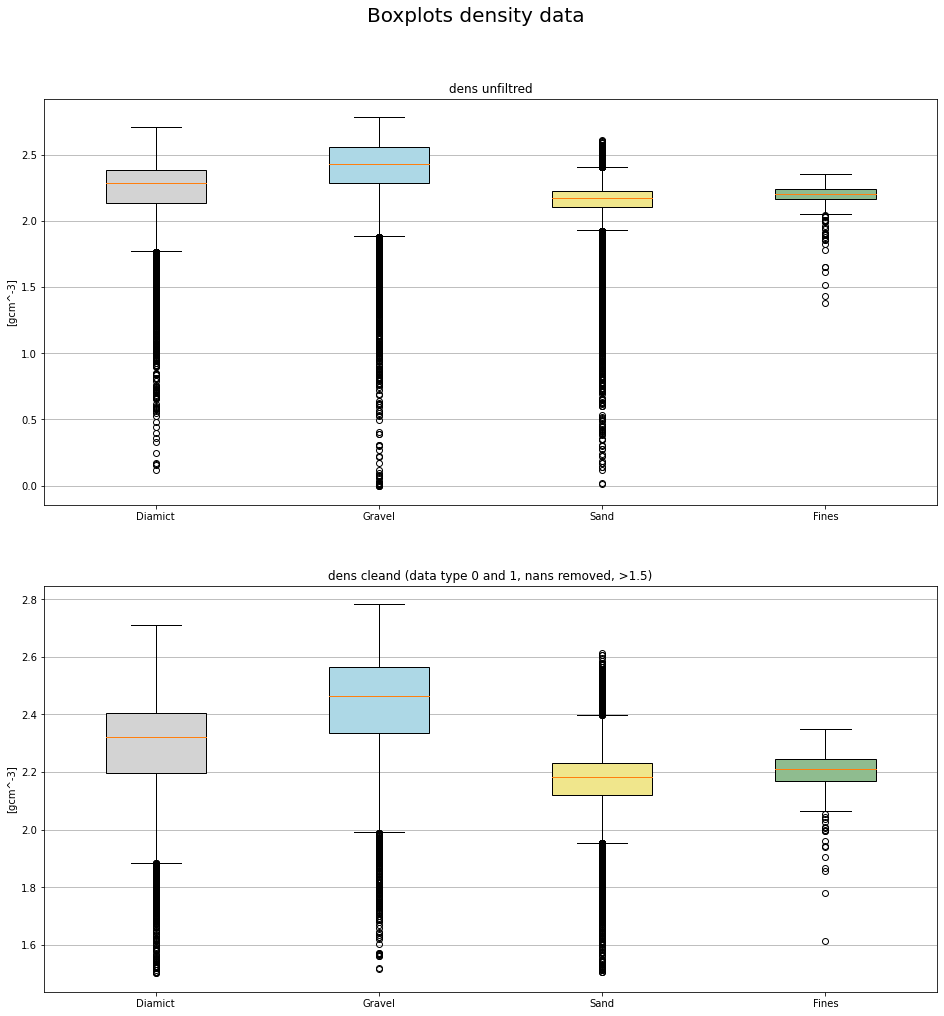

In [34]:
#removing any nans in the data set, otherwise no data ploted -> nan
dens_values_stacked_hist_uf
for i in range(len(dens_values_stacked_hist_uf)):#looping over the data list
    data=dens_values_stacked_hist_uf[i][~np.isnan(dens_values_stacked_hist_uf[i])]#removing nans by nan mask
    dens_values_stacked_hist_uf[i] = data#replacing the old data with the maske 

#bocplot
fig15, ax = plt.subplots(2,1, figsize=(16,16))
fig15.suptitle('Boxplots density data',fontsize=20) 
#seting the position of the title
fig15.subplots_adjust(top=0.9)

#plots, asined as box 1/2 for chaning fill colors
box1 = ax[0].boxplot(dens_values_stacked_hist_uf,patch_artist=True,labels=labels)#unfiltred data
box2 = ax[1].boxplot(dens_values_stacked_hist_fc,patch_artist=True,labels=labels)#filtred data  

#chaning fill colers
#unfiltred data
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
#filtred data    
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)

#grid
ax[0].grid(axis='y')
ax[1].grid(axis='y')

#plot titel
ax[0].set_title('dens unfiltred')
ax[1].set_title('dens cleand (data type 0 and 1, nans removed, >1.5)')

#y-axis label
ax[0].set_ylabel('[gcm^-3]')
ax[1].set_ylabel('[gcm^-3]')

#### 2.6.2 Mag sus data

Text(0, 0.5, '[SIx10^-5]')

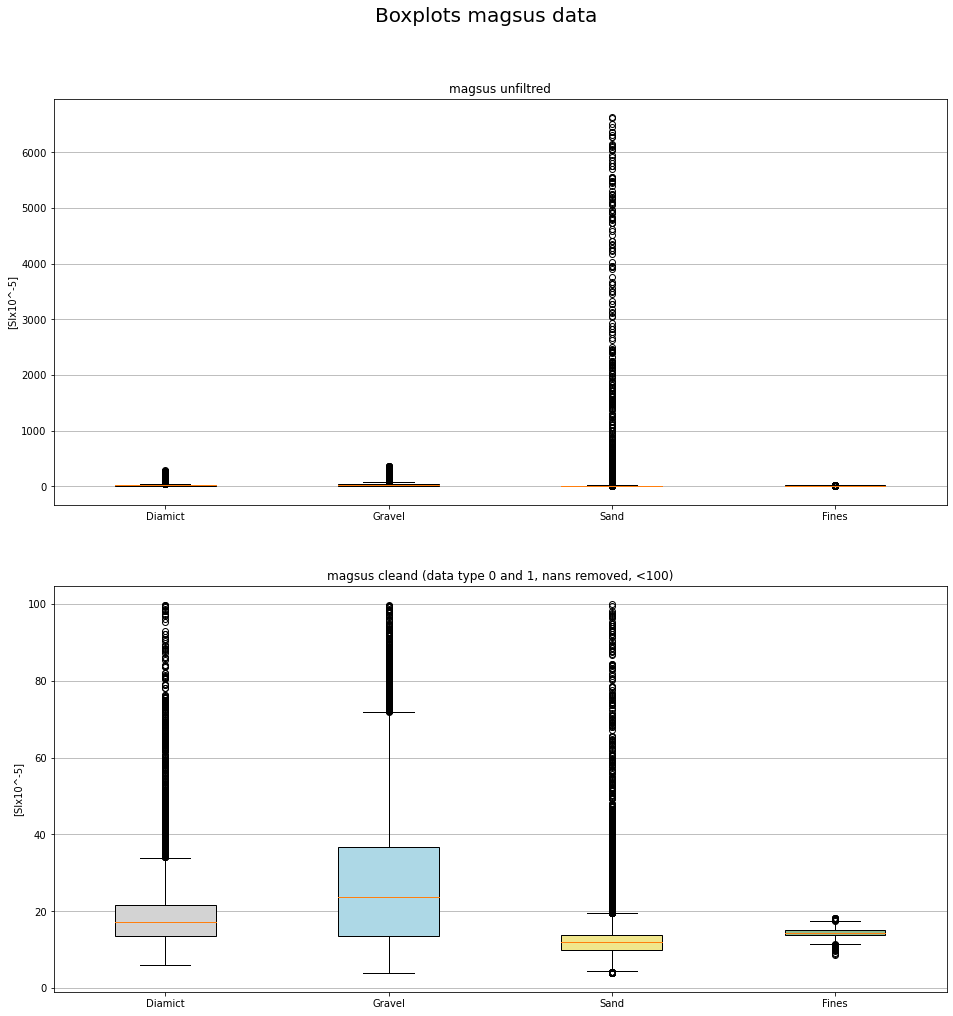

In [35]:
#removing any nans in the data set, otherwise no data ploted -> nan
magsus_values_stacked_hist_uf
for i in range(len(magsus_values_stacked_hist_uf)):#looping over the data list
    data=magsus_values_stacked_hist_uf[i][~np.isnan(magsus_values_stacked_hist_uf[i])]#removing nans by nan mask
    magsus_values_stacked_hist_uf[i] = data#replacing the old data with the maske 

fig16, ax = plt.subplots(2,1, figsize=(16,16))
fig16.suptitle('Boxplots magsus data',fontsize=20) 
#seting the position of the title
fig16.subplots_adjust(top=0.9)

#plots, asined as box 1/2 for chaning fill colors
box1 = ax[0].boxplot(magsus_values_stacked_hist_uf,patch_artist=True,labels=labels)#unfiltred data
box2 = ax[1].boxplot(magsus_values_stacked_hist_fc,patch_artist=True,labels=labels)#filtred data 

#chaning fill colers
#unfiltred data
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
#filtred data        
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)

#grid
ax[0].grid( axis='y')
ax[1].grid( axis='y')

#plot titel
ax[0].set_title('magsus unfiltred')
ax[1].set_title('magsus cleand (data type 0 and 1, nans removed, <100)')

#y-axis label
ax[0].set_ylabel('[SIx10^-5]')
ax[1].set_ylabel('[SIx10^-5]')

#### 2.6.3 Nat gamma data

Text(0, 0.5, '[CPS]')

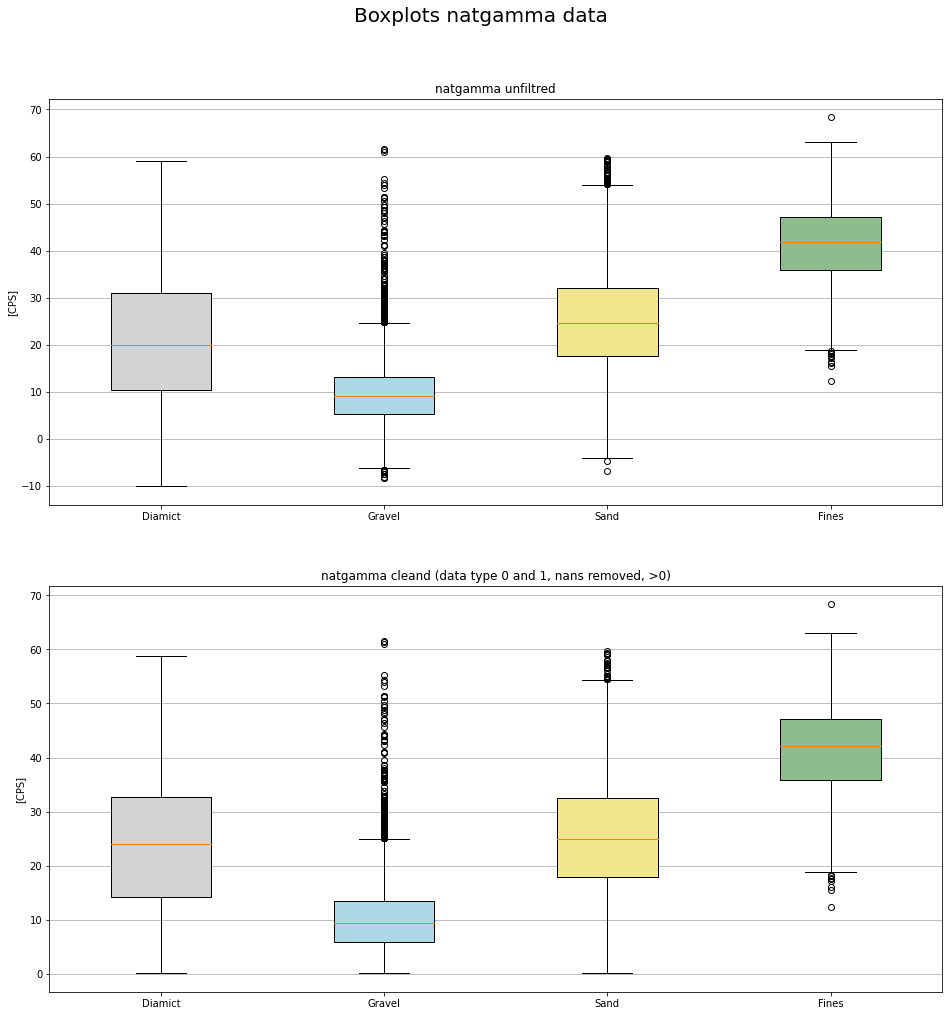

In [36]:
#removing any nans in the data set, otherwise no data ploted -> nan
natgamma_values_stacked_hist_uf
for i in range(len(natgamma_values_stacked_hist_uf)):#looping over the data list
    data=natgamma_values_stacked_hist_uf[i][~np.isnan(natgamma_values_stacked_hist_uf[i])]#removing nans by nan mask
    natgamma_values_stacked_hist_uf[i] = data#replacing the old data with the maske 


fig17, ax = plt.subplots(2,1, figsize=(16,16))
fig17.suptitle('Boxplots natgamma data',fontsize=20) 
#seting the position of the title
fig17.subplots_adjust(top=0.9)

#plots, asined as box 1/2 for chaning fill colors
box1 = ax[0].boxplot(natgamma_values_stacked_hist_uf,patch_artist=True,labels=labels)
box2 = ax[1].boxplot(natgamma_values_stacked_hist_fc,patch_artist=True,labels=labels)


#chaning fill colers
#unfiltred data
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
#filtred data      
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)

#grid
ax[0].grid( axis='y')
ax[1].grid( axis='y')

#plot titel
ax[0].set_title('natgamma unfiltred')
ax[1].set_title('natgamma cleand (data type 0 and 1, nans removed, >0)')

#y-axis label
ax[0].set_ylabel('[CPS]')
ax[1].set_ylabel('[CPS]')

## 3. comparison of the data sets

### 3.1 seting up the needed data

In [37]:
#seting up the data for the scatter plots
#Filtering the dta set (filtering for values, quality clas and removing nans)

#excluding all rows, where density is <1.5
df_reduced_filtred_dens = df_reduced[df_reduced[heade_list_df_reduced[0]]>=1.5].copy()
#excluding all rows, wherre magsus is >100
df_reduced_filtred_dens_magsus = df_reduced_filtred_dens[df_reduced_filtred_dens[heade_list_df_reduced[1]]<=100].copy()
#excluding all rows, wherre natgamma is <0
df_reduced_filtred_dens_magsus_gamma = df_reduced_filtred_dens_magsus[df_reduced_filtred_dens_magsus[heade_list_df_reduced[2]]>=0].copy()
#excluding all disturbed data, Quality clas 2 or bigger
df_reduced_filtred_cq =  df_reduced_filtred_dens_magsus_gamma[df_reduced_filtred_dens_magsus_gamma[heade_list_df_reduced[-2]]<2].copy()
#dropping all rows where are anny remaning nas left 
df_reduced_clean_scatter = df_reduced_filtred_cq.dropna().copy()

#creating and adding the normalised data to the original data frame, (x_norm = x-x_min/x_max-x_mib)
logs_min =pd.DataFrame(df_reduced_clean_scatter[heade_list_df_reduced[0:3]].describe().loc[['min']])#minimal values
logs_max= pd.DataFrame(df_reduced_clean_scatter[heade_list_df_reduced[0:3]].describe().loc[['max']])#maximal values
logs_delta = logs_max.iloc[0] - logs_min.iloc[0]#delta

#adding the normalised data as a new columne to the data frame
df_reduced_clean_scatter = df_reduced_clean_scatter.assign(dens_norm=(
    df_reduced_clean_scatter[heade_list_df_reduced[0]]-logs_min.iloc[0,0])/logs_delta.iloc[0])#normalised dens
df_reduced_clean_scatter = df_reduced_clean_scatter.assign(magsus_norm=(
    df_reduced_clean_scatter[heade_list_df_reduced[1]]-logs_min.iloc[0,1])/logs_delta.iloc[1])#normalised magsus
df_reduced_clean_scatter = df_reduced_clean_scatter.assign(gamma_norm=(
    df_reduced_clean_scatter[heade_list_df_reduced[2]]-logs_min.iloc[0,2])/logs_delta.iloc[2])#normalised nat gamma

#masking and seperating the data into the induvidual sub data sets, 
#extracting the statistical summary of the data for later use
#seting upp needed input
litho_list = [1,7,11,19]#list with numerical code of main litho types (1=diamict, 7=gravel, 11=sand, 19= fines)
#prelocating the later extraced/created values
#for output of pd.describe()
sumary_list = [0]*len(litho_list)#not normalised
sumary_list_norm = [0]*len(litho_list)#normalised to 1
#masked data sets, sub data sets
data_log = [0]*len(litho_list)#not normalised
data_log_norm = [0]*len(litho_list)#normalised to 1

#for-loop to mask over the four main lithogroups and extract the subdata sets and the statistical summary for later use (pd.describe())
for i in range(len(litho_list)): 
    #renaming the data frame for easier handling
    all_data = df_reduced_clean_scatter
    #masking over the four main litho types, 
    all_data_f = all_data[df_reduced_clean_scatter[heade_list_df_reduced[-1]] == litho_list[i]]
    
    #extracting the log data (Dens, Magsus, Natgamma)
    data = all_data_f.iloc[:,0:3]#not normalised
    data_norm = all_data_f.iloc[:,5:]#normalised 
    #adding the data to the coresponding lsit  
    data_log[i]= data#not normalised  
    data_log_norm[i] = data_norm#normalised                               
    #adding the statisitc output summary of the masked subdata set
    sumary_list[i] = pd.DataFrame(data.describe()).round(2)#not normalised  
    sumary_list_norm[i] = pd.DataFrame(data_norm.describe()).round(2)#normalised


if control == True:  
    #checking the impacts of the different filters
    print(f'Unfiltred: {df_reduced.info()}')
    print(f'densety filtred: {df_reduced_filtred_dens.info()}')
    print(f'magsus filtred: {df_reduced_filtred_dens_magsus.info()}')
    print(f'nat gamma filtred: {df_reduced_filtred_dens_magsus_gamma.info()}')
    print(f'quality class filtred: {df_reduced_filtred_cq.info()}')
    print(f'nan filtred: {df_reduced_filtred_cq.info()}')
    print(f'cleand data set:{df_reduced_clean_scatter.info()}')
    print(f'summary list:{sumary_list}')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47591 entries, 0 to 47590
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dens [g/cc]                  46350 non-null  float64
 1   Mag_Sus BS_cor [SI x 10^-5]  46350 non-null  float64
 2   Nat_Gamma [cps]              46350 non-null  float64
 3   core_quality                 47591 non-null  int64  
 4   litho types                  47591 non-null  int64  
dtypes: float64(3), int64(2)
memory usage: 1.8 MB
Unfiltred: None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 45388 entries, 23 to 47587
Data columns (total 5 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Dens [g/cc]                  45388 non-null  float64
 1   Mag_Sus BS_cor [SI x 10^-5]  45388 non-null  float64
 2   Nat_Gamma [cps]              45388 non-null  float64
 3   core_quality    

### 3.2 Scatter plots

#### 3.2.1 Summary scatter plots

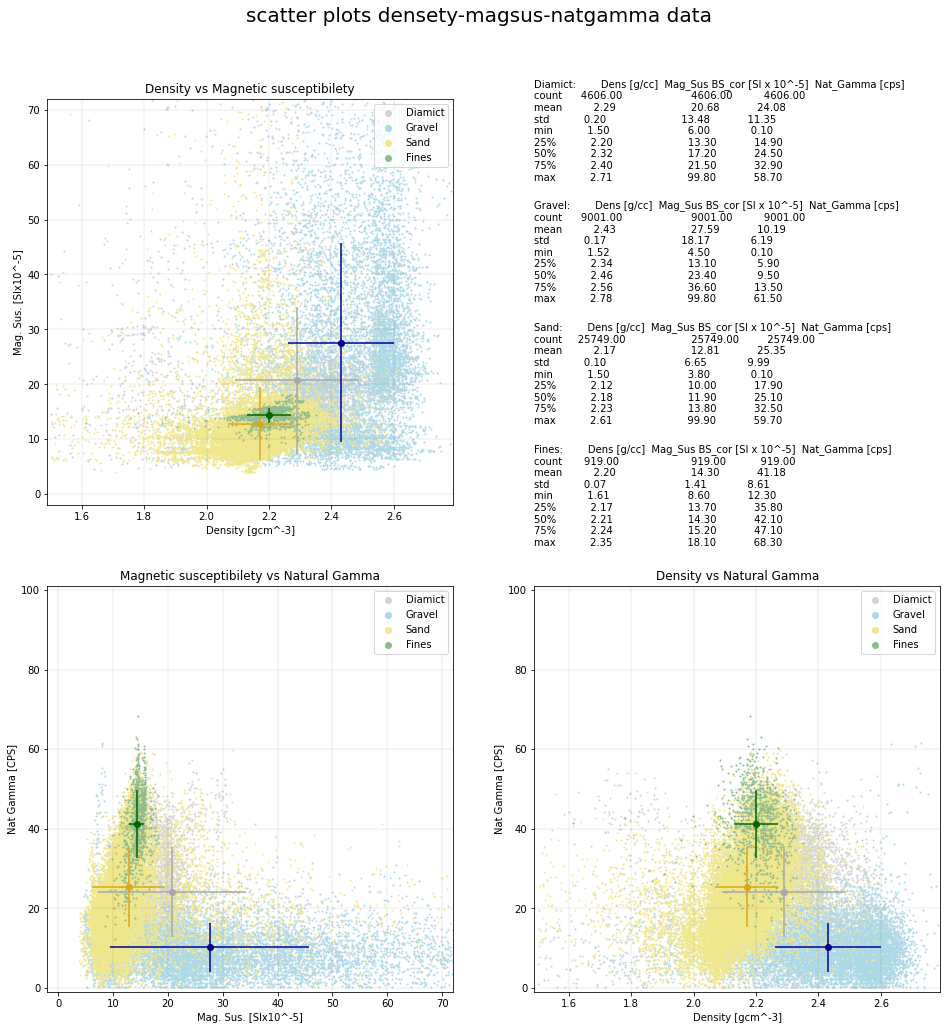

In [38]:
#setin up the needed input for the scatter ploting
colors = ['lightgray','lightblue','khaki','darkseagreen']#color list
colors_dark = ['darkgray','darkblue','goldenrod','darkgreen']#color list
labels = ['Diamict','Gravel','Sand','Fines']#list of labels for subsets of histogramms
axis_labels = ['Density [gcm^-3]','Mag. Sus. [SIx10^-5]','Nat Gamma [CPS]']#axis labes
titel_list = ['Density vs Magnetic susceptibilety','Magnetic susceptibilety vs Natural Gamma',
              'Density vs Natural Gamma']#titel 
axis_limits = [[1.49,2.79],[-2, 72],[-1, 101]]#axis limnits

index1 = [0,1,0]#indices of used X data/axis 
index2 = [1,2,2]#indices of used y data/axis

#scatterplot cobined in three panels, plots all four litho groups in one pannel
#seting up the supplots
fig18, ax = plt.subplots(2,2, figsize=(16,16))
fig18.suptitle('scatter plots densety-magsus-natgamma data',fontsize=20) 
#seting the position of the title
fig18.subplots_adjust(top=0.9)

#for-loop to plot the combined scatterplots of of the four main litho groups 
#plot 1 (0/0):Density vs Magnetic susceptibilety
#plot 2 (1/0):Magnetic susceptibilety vs Natural Gamma
#plot 3 (1/1):Density vs Natural Gamma

c = 0#sets start value of counter to 0
for i in range(2):#looping over the colums
    for j in range(2):#looping over the rows
        if (i == 0) and (j==1):#condition to hied plot at position 0/1, 
            ax[i][j].axis('off')
            for x in range(len(colors)):#plots the statistical summary of the 4 subdata sets at the position 0/1
                ax[i][j].text(0,(0.8-0.3*x),f'{labels[x]}: {sumary_list[x]}',fontsize=10)
            c=c-1#reduced the counter by 1 to corect the needed value for the other plots
        else: 
            #plot comand loops over the four main litho groups
            for x in range(len(colors)):
                #sactter plot of whole subdaqta set
                ax[i][j].scatter(data_log[x].iloc[:,index1[c]],data_log[x].iloc[:,index2[c]],c=colors[x],s = 1,
                                 label=labels[x]) 
                #plots the mean value with the standart deviation
                ax[i][j].errorbar(sumary_list[x].iloc[1,index1[c]],sumary_list[x].iloc[1,index2[c]],
                                  xerr=sumary_list[x].iloc[2,index1[c]],yerr= sumary_list[x].iloc[2,index2[c]],
                                  fmt='o', c=colors_dark[x])
                #plot setings
                ax[i][j].set_title(titel_list[c])#titel
                ax[i][j].set_ylabel(axis_labels[index2[c]])#y-axis label
                ax[i][j].set_xlabel(axis_labels[index1[c]])#x-axis label
                ax[i][j].set_ylim(axis_limits[index2[c]])#y-axis limits
                ax[i][j].set_xlim(axis_limits[index1[c]])#x-axis limits
                ax[i][j].legend(markerscale=6,loc="upper right")#legend
                ax[i][j].grid(color='k', linestyle='--', linewidth=0.1)#grid                               
        c = c+1#updating the counter if plot was compleeted
                

#### 3.2.2 Induvidual scatter plots

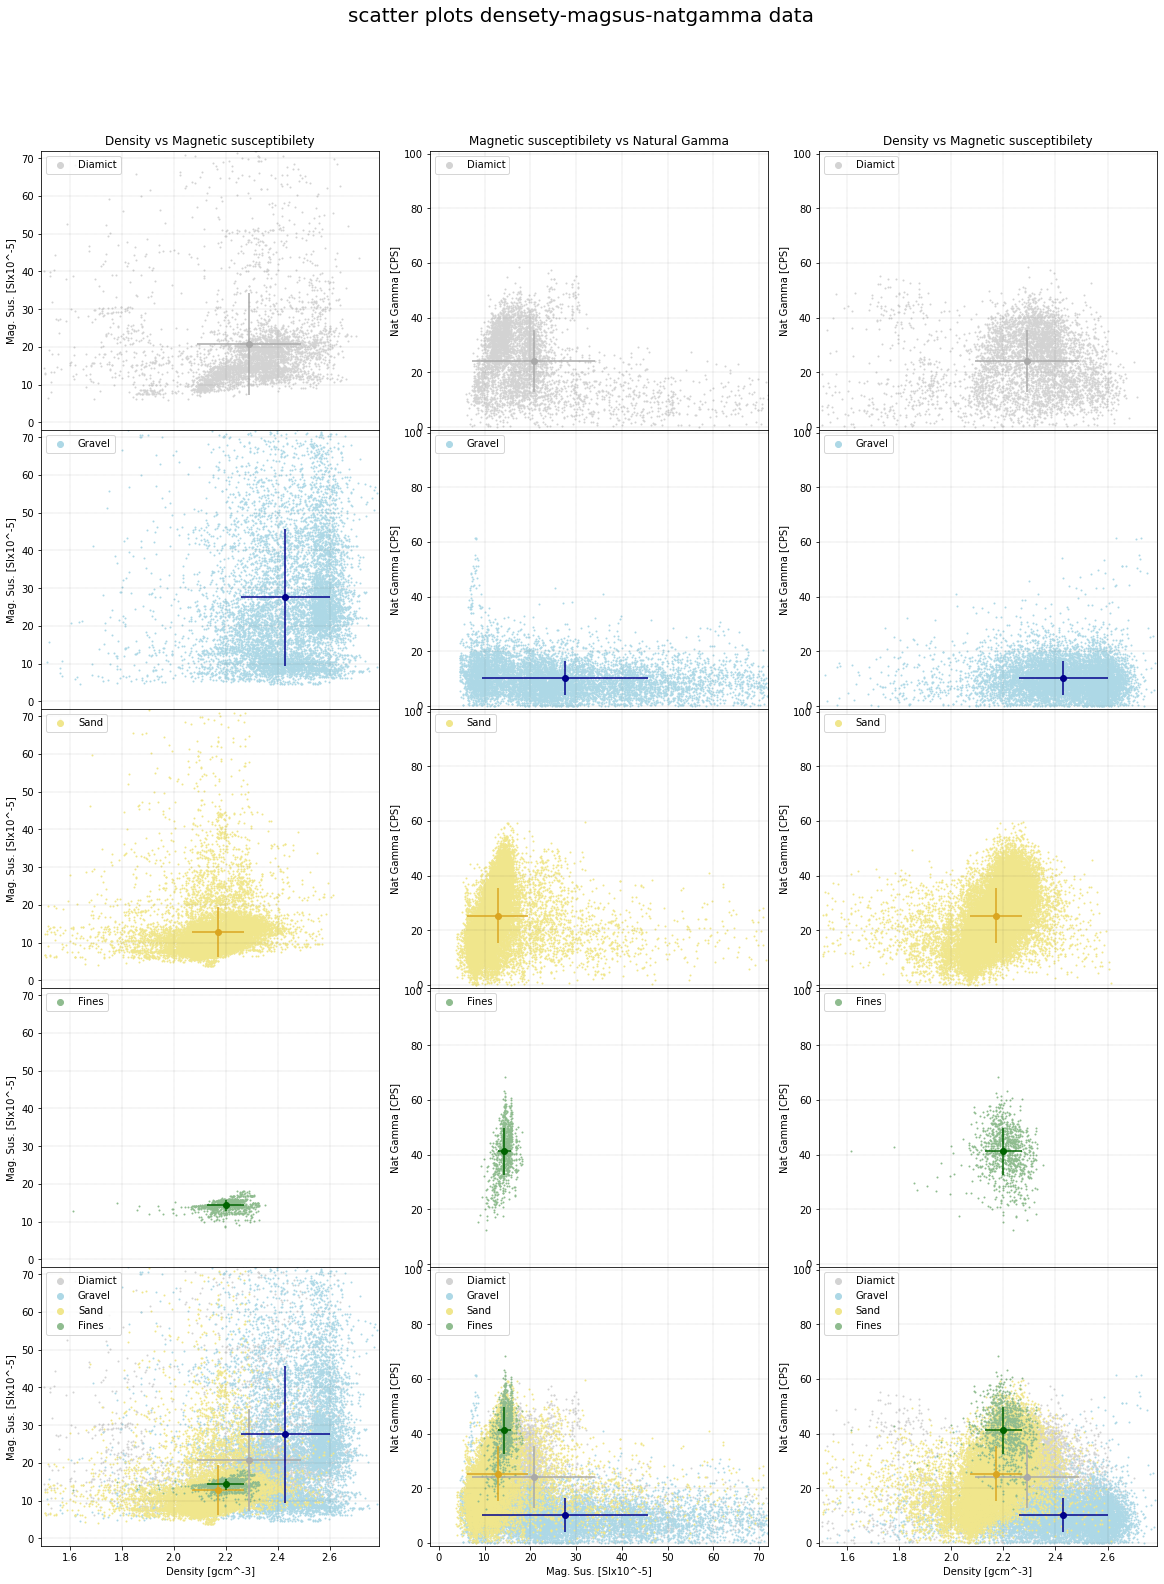

In [39]:
#plot of the induvidual components of the of the three logs and a summary plot in the last row
#seting up the supplots
fig19, ax = plt.subplots(5,3, figsize=(20,25),sharex='col')
fig19.suptitle('scatter plots densety-magsus-natgamma data',fontsize=20) 
#seting the position of the title
fig19.subplots_adjust(top=0.9,wspace=0.15, hspace=0)

#for loop to plot the scatter plots of each subdata set.
#rows: 1 = diamict; 2 = gravel; 3 = sand; 4 = fines; 5 = combined
#columnes: 1: Dens/Magsus; 2: Magsus/Natgamma; 3: dens/natgamma

for i in range(len(index1)):#looping over the columnes 
        for j in range(len(colors)+1):#looping over the rows
       
            if j == 0:#sets tital and x-axis limits for sheard x axis of plots in the first row
                ax[j][i].set_title(titel_list[index1[i]])#titel
                ax[j][i].set_xlim(axis_limits[index1[i]])#x-axis limit 

            #last row of plots, summary plot
            #if j == indices of last row
            if j == len(colors): 
                #summary plot of all four litho groups (lopus over all four sub data set)
                for x in range(len(colors)):
                    #scatterplots
                    ax[j][i].scatter(data_log[x].iloc[:,index1[i]],data_log[x].iloc[:,index2[i]],c=colors[x],
                                     s=1,label=labels[x])
                    #plots the mean with std range of each litho group
                    ax[j][i].errorbar(sumary_list[x].iloc[1,index1[i]],
                                      sumary_list[x].iloc[1,index2[i]], xerr=sumary_list[x].iloc[2,index1[i]],
                                      yerr= sumary_list[x].iloc[2,index2[i]], fmt='o', c=colors_dark[x])                
                    ax[j][i].set_xlabel(axis_labels[index1[i]])#x axis label                

            else:#if plot is not in the last row, induvidal plots of each litho group 
                #scatter plot
                ax[j][i].scatter(data_log[j].iloc[:,index1[i]],data_log[j].iloc[:,index2[i]],c=colors[j],s = 1,label=labels[j])
                #plots the mean with std range of each sub data set
                ax[j][i].errorbar(sumary_list[j].iloc[1,index1[i]],sumary_list[j].iloc[1,index2[i]],
                                  xerr=sumary_list[j].iloc[2,index1[i]],yerr= sumary_list[j].iloc[2,index2[i]],
                                  fmt='o', c=colors_dark[j])
            
            #for all plots
            ax[j][i].set_ylabel(axis_labels[index2[i]])#y axis label
            ax[j][i].set_ylim(axis_limits[index2[i]])#y axis limits
            ax[j][i].legend(markerscale=6,loc="upper left")#plots legend
            ax[j][i].grid(color='k', linestyle='--', linewidth=0.1)#grid        

### 3.3 Ternary scatter plots

#### 3.3.1 Sumary scatter plots

Text(0.5, 1.1, 'normalised ternary scatter plot densety-magsus-natgamma data')

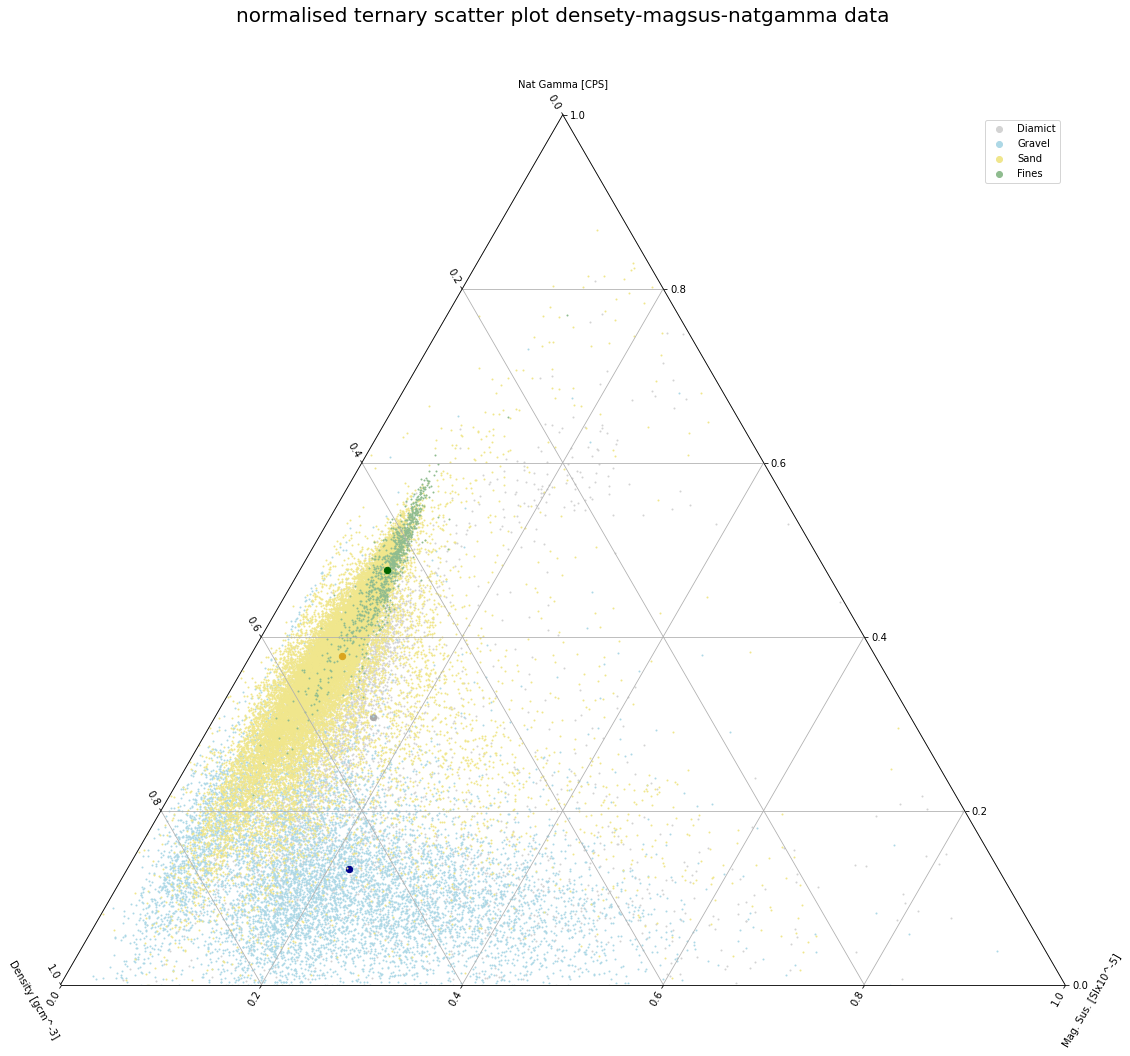

In [40]:
#creqating a normalised ternary plot of the density, magsus, and natgamma data
fig20 = plt.figure(figsize=(18, 18))#seting up the plot

ax1= fig20.add_subplot(1, 1, 1, projection="ternary")#adding a figur/axis to the subplot
#ploting the four supdata sets
for i in range(len(colors)):#loops over the four lihto groups
    #scatterplot of all data
    ax1.scatter(data_log_norm[i].iloc[:,2],data_log_norm[i].iloc[:,0],data_log_norm[i].iloc[:,1],
                c=colors[i],s = 1,label=labels[i])
    #scatterploit of mean
    ax1.scatter(sumary_list_norm[i].iloc[1,2],sumary_list_norm[i].iloc[1,0],sumary_list_norm[i].iloc[1,1]
                ,s = 40,c=colors_dark[i])
#other setings
ax1.grid()#grid
ax1.legend(markerscale=6)#legend
#axis labels
ax1.set_tlabel(axis_labels[2])
ax1.set_llabel(axis_labels[0])
ax1.set_rlabel(axis_labels[1])
#titel
ax1.set_title('normalised ternary scatter plot densety-magsus-natgamma data',fontsize=20, x = 0.5, y = 1.1)


#### 3.3.2 induvidual scatter plots

In [41]:
#creating 4 induvidual normalised ternary plots (Density, Magsus, and Natgamma) of the four main lihto types
fig21 = plt.figure(figsize=(18, 18))#seting up the figur
fig21.subplots_adjust(left=0.075, right=0.85, wspace=0.3)#adjusting the the position of the induvidual plots
fig21.suptitle('normalised ternary scatter plot densety-magsus-natgamma data',fontsize=20)#seting the plot titel


#looping over the data to plot the induvidual data sets
for i in range(len(colors)):
    ax= fig20.add_subplot(2, 2, i+1, projection="ternary")#adding a supplot
    ax.scatter(data_log_norm[i].iloc[:,2],data_log_norm[i].iloc[:,0],data_log_norm[i].iloc[:,1],c=colors[i],
               s = 1,label=labels[i])
    #meaqn
    ax.scatter(sumary_list_norm[i].iloc[1,2],sumary_list_norm[i].iloc[1,0],
                   sumary_list_norm[i].iloc[1,1],s = 40,c=colors_dark[i])
    
    #adding a line going throug the mean in respect to each axis
    #ax.axtline(sumary_list_norm[i].iloc[1,2]/sum(sumary_list_norm[i].iloc[1]),ls = '-',c=colors_dark[i])
    #ax.axlline(sumary_list_norm[i].iloc[1,0]/sum(sumary_list_norm[i].iloc[1]),ls = '-',c=colors_dark[i])
    #ax.axrline(sumary_list_norm[i].iloc[1,1]/sum(sumary_list_norm[i].iloc[1]),ls = '-',c=colors_dark[i])
    #adding a line going throug the mean-std in respect to each axis
    #ax.axtline(np.add(sumary_list_norm[i].iloc[1,2],sumary_list_norm[i].iloc[2,2])/sum(sumary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    #ax.axlline(np.add(sumary_list_norm[i].iloc[1,0],sumary_list_norm[i].iloc[2,0])/sum(sumary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    #ax.axrline(np.add(sumary_list_norm[i].iloc[1,1],sumary_list_norm[i].iloc[2,1])/sum(sumary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    #adding a line going throug the mean-std in respect to each axis
    #ax.axtline(np.subtract(sumary_list_norm[i].iloc[1,2],sumary_list_norm[i].iloc[2,2])/sum(sumary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    #ax.axlline(np.subtract(sumary_list_norm[i].iloc[1,0],sumary_list_norm[i].iloc[2,0])/sum(sumary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    #ax.axrline(np.subtract(sumary_list_norm[i].iloc[1,1],sumary_list_norm[i].iloc[2,1])/sum(sumary_list_norm[i].iloc[1]),ls = '--',c=colors_dark[i])
    
    #general plotings
    ax.grid()#grid
    #axis labels
    ax.set_tlabel(axis_labels[2])
    ax.set_llabel(axis_labels[0])
    ax.set_rlabel(axis_labels[1])
    #titel
    ax.set_title(labels[i])
    


<Figure size 1296x1296 with 0 Axes>